<a href="https://colab.research.google.com/github/venkatanadikatla/pytorch/blob/main/Student_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


In this we are evaluating the student performance and in order to to approach this project, we will perform Bayesian analysis to answer key questions about the students' performance, determine where struggles occur, and suggest areas for targeted test preparation. Here's how we can structure the analysis:

# **But, First I would like to talk about what is Bayesian and why Bayesian in quick summary:**
Excerpt from Probabilistic-Programming-and-Bayesian-Methods-for-Hackers  Chapter1_Introduction:

## **The Philosophy of Bayesian Inference:**
"You are a skilled programmer, but bugs still slip into your code. After a particularly difficult implementation of an algorithm, you decide to test your code on a trivial example. It passes. You test the code on a harder problem. It passes once again. And it passes the next, even more difficult, test too! You are starting to believe that there may be no bugs in this code...

If you think this way, then congratulations, you already are thinking Bayesian! Bayesian inference is simply updating your beliefs after considering new evidence."

## **Quick note on why Bayesian:**
"The Bayesian world-view interprets probability as measure of believability in an event, that is, how confident we are in an event occurring. In fact, we will see in a moment that this is the natural interpretation of probability."


## **Overview:**
Strengths of Bayesian Statistics that are critical here:
1. Great flexibility to quickly and iteratively build statistical models.
2. Offers principled way of dealing with uncertainity.
3. Don't just want most likely outcome but distribution of all possible outcomes.
4. Allows expert information to guide model by using informative priors.






## **Back to Student Performance project:**

#### We will perform the following tests using Bayesian methods:



*   Gender-Based Performance Analysis: Do male and female students perform differently in reading, writing, and math: **Refer Model1, Model2, and Model3 (Weakly Informative prior)**

*   Test Preparation Impact: Does completing a test preparation course lead to better performance in any of the subjects **Refer Model4 (Weakly Informative prior)**
*   Race/Ethnicity-Based Performance Differences: Are there performance differences across race/ethnicity groups in any of the subjects **Refer Model5 (Weakly Informative prior)**


*   Parental Education and Performance: Does the parental level of education correlate with student performance **Refer Model6 (Weakly Informative prior)**


*   Bayesian analysis to compare Parental Education with Student Performance (parental level of education correlate with student performance) **Refer Model-7(Non-Informative Prior)**

*   Normal Likelihood (for Continuous Data) with Conjugate Priors: "Reading Scores by Gender: Use Normal-Inverse-Gamma priors for the means and variances of reading scores for male and female students. **Refer Model-8 (Conjugate Prior)**

*   Normal Likelihood (for Continuous Data) with Conjugate Priors: Math Scores by Parental Education (Normal-Inverse-Gamma Priors). **Refer Model-9 (Conjugate Prior)**
*   Binary data from the Student Performance dataset. **Refer Model-10 (Bernoulli likelihood with Beta conjugate prior)**


*   Number of Students Completing Test Preparation. **Refer Model-11 Poisson Likelihood with Gamma Conjugate Prior.**


*   Modeling Pass/Fail Outcomes in Reading Scores. **Refer Model-12 Binomial likelihood model with a Beta conjugate prior.**

*   Normal approximation using a Taylor series expansion for Math scores.**Refer Model-13**






### **For this project, I will use python - pymc version in lieu of R**

**Below are the steps I followed for Bayesian Tests:**

For each test:


*   Model Setup: We'll use the test scores (reading, writing, math) as continuous outcomes and test the effect of factors like gender, test preparation, and race/ethnicity.

*   Priors: Choose reasonable priors for the parameters (e.g., the mean and variance of the scores for each group).
*   Inference: Use PyMC to estimate the posterior distributions and compute credibility intervals for the group means.


*   Visualization: Create visual aids like posterior plots and credibility interval visualizations to show the findings.


In [4]:
!pip install pymc arviz


In [5]:
!pip install jax jaxlib


In [1]:
from google.colab import files
uploaded = files.upload()


Saving Student.csv to Student.csv


In [7]:
import pymc as pm
import pandas as pd
import arviz as az
import matplotlib.pyplot as plt
df = pd.read_csv('Student.csv')

In [8]:
df

,gender,race/ethnicity,parental level of education,lunch,test _preparation_course,math_score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


# **Model-1(Weakly Informative prior): Bayesian Analysis to compare the male and female students across one subject - Reading Scores.**

**Bayesian Approach:**

We will model the reading/math/writing scores of male and female students as coming from Normal distributions, with separate means and shared standard deviations for each group.
We will use priors for the mean reading/math/writing scores and standard deviation **( sigma = 10 - becuase the reading/math/writing scores are between 0 to 100)**, and we will infer the posterior distributions for the means of male and female students' reading/math/writing scores.
The key result will be the credible intervals for the posterior means of male and female students' reading/math/writing scores. If the credible intervals do not overlap, this suggests a significant difference between the groups.

### Below cell represents the code:

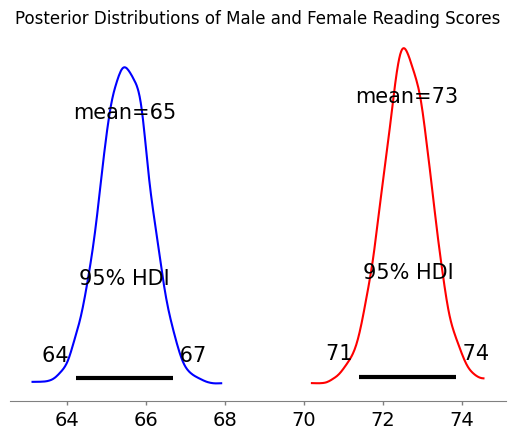

             mean     sd  hdi_2.5%  hdi_97.5%  mcse_mean  mcse_sd  ess_bulk  \
mu_male    65.478  0.632    64.223     66.685      0.008    0.006    6515.0   
mu_female  72.597  0.619    71.404     73.856      0.008    0.006    6036.0   

           ess_tail  r_hat  
mu_male      3315.0    1.0  
mu_female    3009.0    1.0  


In [7]:
import pymc as pm
import pandas as pd
import arviz as az
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('Student.csv')

# Extract reading scores by gender and having them stored as values
reading_scores_male = data[data['gender'] == 'male']['reading score'].values
reading_scores_female = data[data['gender'] == 'female']['reading score'].values

# Define the Bayesian model
with pm.Model() as gender_model:
    # Priors for the means of male and female reading scores
    #mu=70 becaue of that is close to average of 70
    #sigma = 10 (becuase the reading scores are between 0 to 100)
    mu_male = pm.Normal('mu_male', mu=70, sigma=10) # This defines the prior distribution for Male students
    mu_female = pm.Normal('mu_female', mu=70, sigma=10)# This defines the prior distribution for Female students

    # Shared prior for the standard deviation of the reading scores
    sigma = pm.HalfNormal('sigma', sigma=10) # This defines the prior distribution for standard deviation. Using half normal to have the value positive.

    # Likelihood for male and female reading scores
    male_obs = pm.Normal('male_obs', mu=mu_male, sigma=sigma, observed=reading_scores_male)
    female_obs = pm.Normal('female_obs', mu=mu_female, sigma=sigma, observed=reading_scores_female)

    # Inference: Sample from the posterior distribution
    trace_gender = pm.sample(2000, tune=1000, return_inferencedata=True)
    #This runs the MCMC sampling process to estimate the posterior distributions of the parameters (mu_male, mu_female, sigma).
    # 2000 samples are drawn, and 1000 of them are used for tuning (i.e., discarded during the "warm-up" phase).
    # THis is stored in "trace_gender"

# Plot posterior distributions for the means of male and female students
#
# Plot posterior distributions for the means of male and female students
fig, ax = plt.subplots()

# Male distribution (set color to 'blue')
az.plot_posterior(trace_gender, var_names=['mu_male'], hdi_prob=0.95, color='blue', ax=ax)

# Female distribution (set color to 'red')
az.plot_posterior(trace_gender, var_names=['mu_female'], hdi_prob=0.95, color='red', ax=ax)

# Show the plot
plt.title('Posterior Distributions of Male and Female Reading Scores')
plt.show()
# Arviz library plots the distributions for mu_male and mu_female
# It also displays the It displays the credible intervals (in this case, the 95% Highest Density Interval (HDI))
# which represent the most likely values for the mean reading scores of males and females, based on the data.


# Summarize the posterior distributions
summary = az.summary(trace_gender, var_names=['mu_male', 'mu_female'], hdi_prob=0.95)
#Highest Density Interval = 95%
print(summary)


**Interpreting Results for Reading Scores (Gender Difference-Model1):**

**In this analysis, we computed the 95% credibility intervals for the mean reading scores of male and female students. Here are the key results:**


**No Overlap in HDI:**

The 95% HDI for males is [64.22, 66.68].- The mean reading score for male students is 65.47. This means that we are 95% confident that the true mean reading score for male students lies between 64.22 and 66.68.

The 95% HDI for females is [71.40, 73.85].- The mean reading score for female students is 72.59. We are 95% confident that the true mean reading score for female students lies between 71.40 and 73.85.

Since these intervals do not overlap, it strongly suggests that the true mean reading scores for male and female students are different. There is no credible overlap between these intervals, meaning it is very unlikely that the true mean reading score for male students is the same as for female students.

**Conclusion:**
The lack of overlap between the 95% HDIs indicates a credible difference (or statistically significant difference) between the reading scores of male and female students. The mean reading score for female students is higher than that for male students, and the difference is large enough to be meaningful, not due to random variation.
This means that, based on the data, we can be quite confident that female students, on average, perform better in reading than male students.

# **Model-2(Weakly Informative prior): Bayesian Analysis to compare the male and female students across one subject - Math Scores.**
**I will use and consider same Bayesian approach and same proiors for this model as well as I did for Model-1(Reading Score):**

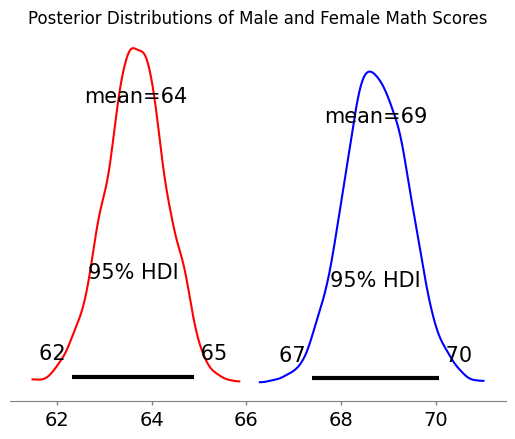

             mean     sd  hdi_2.5%  hdi_97.5%  mcse_mean  mcse_sd  ess_bulk  \
mu_male    68.743  0.688    67.393     70.075      0.009    0.007    5519.0   
mu_female  63.658  0.658    62.315     64.884      0.008    0.006    6284.0   

           ess_tail  r_hat  
mu_male      2571.0    1.0  
mu_female    3125.0    1.0  


In [14]:
import pymc as pm
import pandas as pd
import arviz as az
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('Student.csv')

# Extract math scores by gender
math_scores_male = data[data['gender'] == 'male']['math_score'].values
math_scores_female = data[data['gender'] == 'female']['math_score'].values

# Define the Bayesian model for gender-based analysis of math scores
with pm.Model() as gender_math_model:
    # Priors for the means of male and female math scores
    mu_male = pm.Normal('mu_male', mu=70, sigma=10)
    mu_female = pm.Normal('mu_female', mu=70, sigma=10)

    # Shared prior for the standard deviation of the math scores
    sigma = pm.HalfNormal('sigma', sigma=10)

    # Likelihood for male and female math scores
    male_obs = pm.Normal('male_obs', mu=mu_male, sigma=sigma, observed=math_scores_male)
    female_obs = pm.Normal('female_obs', mu=mu_female, sigma=sigma, observed=math_scores_female)

    # Inference: Sample from the posterior distribution
    trace_gender_math = pm.sample(2000, tune=1000, return_inferencedata=True)

# Plot posterior distributions for the means of male and female students
# Male distribution (set color to 'blue')
fig, ax = plt.subplots()
az.plot_posterior(trace_gender_math, var_names=['mu_male'], hdi_prob=0.95, color='blue', ax=ax)

# Female distribution (set color to 'red')
az.plot_posterior(trace_gender_math, var_names=['mu_female'], hdi_prob=0.95, color='red', ax=ax)

# Show the plot
plt.title('Posterior Distributions of Male and Female Math Scores')
plt.show()
# Arviz library plots the distributions for mu_male and mu_female
# It also displays the It displays the credible intervals (in this case, the 95% Highest Density Interval (HDI))
# which represent the most likely values for the mean reading scores of males and females, based on the data.


# Summarize the posterior distributions
summary_math = az.summary(trace_gender_math, var_names=['mu_male', 'mu_female'], hdi_prob=0.95)
print(summary_math)


**Interpreting Results for Math Scores (Gender Difference-Model2):**

**In this analysis, we computed the 95% credibility intervals for the mean math scores of male and female students. Here are the key results:**

**No Overlap in HDI:**

The 95% HDI for males is [67.39, 70.07].- The mean math score for male students is 68.74. This means that we are 95% confident that the true mean math score for male students lies between 67.39 to 70.07.

The 95% HDI for females is [62.31, 64.88].- The mean math score for female students is 63.65. We are 95% confident that the true mean math score for female students lies between 62.31 to 64.88.

Since these intervals do not overlap, it strongly suggests that the true mean math scores for male and female students are different. There is no credible overlap between these intervals, meaning it is very unlikely that the true mean math score for male students is the same as for female students.

Conclusion: The lack of overlap between the 95% HDIs indicates a credible difference (or statistically significant difference) between the math scores of male and female students. The mean math score for male students is higher than that for female students, and the difference is large enough to be meaningful, not due to random variation. This means that, based on the data, we can be quite confident that male students, on average, perform better in math than female students.



# **Model-3(Weakly Informative prior): Bayesian Analysis to compare the male and female students across one subject - Writing Scores.**
**I will use and consider same Bayesian approach and same proiors for this model as well as I did for Model-1(Reading Score):**

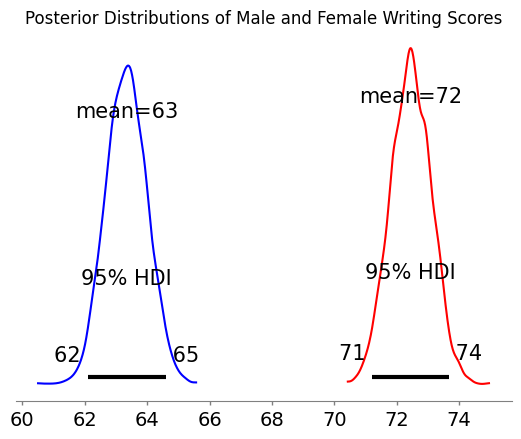

             mean     sd  hdi_2.5%  hdi_97.5%  mcse_mean  mcse_sd  ess_bulk  \
mu_male    63.340  0.651    62.091     64.599      0.009    0.006    5405.0   
mu_female  72.456  0.644    71.210     73.685      0.009    0.006    5439.0   

           ess_tail  r_hat  
mu_male      3261.0    1.0  
mu_female    2826.0    1.0  


In [13]:
import pymc as pm
import pandas as pd
import arviz as az
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('Student.csv')

# Extract writing scores by gender
writing_scores_male = data[data['gender'] == 'male']['writing score'].values
writing_scores_female = data[data['gender'] == 'female']['writing score'].values

# Define the Bayesian model for gender-based analysis of writing scores
with pm.Model() as gender_writing_model:
    # Priors for the means of male and female writing scores
    mu_male = pm.Normal('mu_male', mu=70, sigma=10)
    mu_female = pm.Normal('mu_female', mu=70, sigma=10)

    # Shared prior for the standard deviation of the writing scores
    sigma = pm.HalfNormal('sigma', sigma=10)

    # Likelihood for male and female writing scores
    male_obs = pm.Normal('male_obs', mu=mu_male, sigma=sigma, observed=writing_scores_male)
    female_obs = pm.Normal('female_obs', mu=mu_female, sigma=sigma, observed=writing_scores_female)

    # Inference: Sample from the posterior distribution
    trace_gender_writing = pm.sample(2000, tune=1000, return_inferencedata=True)

# Plot posterior distributions for the means of male and female students
# Male distribution (set color to 'blue')
fig, ax = plt.subplots()
az.plot_posterior(trace_gender_writing, var_names=['mu_male'], hdi_prob=0.95, color='blue', ax=ax)

# Female distribution (set color to 'red')
az.plot_posterior(trace_gender_writing, var_names=['mu_female'], hdi_prob=0.95, color='red', ax=ax)

# Show the plot
plt.title('Posterior Distributions of Male and Female Writing Scores')
plt.show()
# Arviz library plots the distributions for mu_male and mu_female
# It also displays the It displays the credible intervals (in this case, the 95% Highest Density Interval (HDI))
# which represent the most likely values for the mean reading scores of males and females, based on the data.


# Summarize the posterior distributions
summary_writing = az.summary(trace_gender_writing, var_names=['mu_male', 'mu_female'], hdi_prob=0.95)
print(summary_writing)



**Interpreting Results for Writing Scores (Gender Difference-Model3):**


**In this analysis, we computed the 95% credibility intervals for the mean Writing scores of male and female students. Here are the key results:**

**No Overlap in HDI:**

The 95% HDI for males is [62.09, 64.59].- The mean writing score for male students is 63.34. This means that we are 95% confident that the true mean Writing score for male students lies between 62.09 to 64.59.

The 95% HDI for females is [71.21, 73.68].- The mean writing score for female students is 72.45. We are 95% confident that the true mean Writing score for female students lies between 71.21 to 73.68

Since these intervals do not overlap, it strongly suggests that the true mean Writing scores for male and female students are different. There is no credible overlap between these intervals, meaning it is very unlikely that the true mean Writing score for male students is the same as for female students.

Conclusion: The lack of overlap between the 95% HDIs indicates a credible difference (or statistically significant difference) between the Writing scores of male and female students. The mean Writing score for female students is higher than that for male students, and the difference is large enough to be meaningful, not due to random variation. This means that, based on the data, we can be quite confident that female students, on average, perform better in Writing than male students.

# **Model-4(Weakly Informative prior): Bayesian Analysis on analyzing the impact of test preparation on student performance across all three subjects (Reading, Math, Writing).**

#### I will compare with students who completed the test preparation course vs those who did not.


**Bayesian Approach:**
We will model the scores of students who completed the test preparation course and those who didn’t as coming from Normal distributions with different means (**Using student prep-70 and student not prepared-65**)and shared standard deviations **(10)**.
I will estimate the posterior distributions of the mean scores for each group (completed vs. none).
I will use credible intervals to assess whether the differences between the two groups are significant.

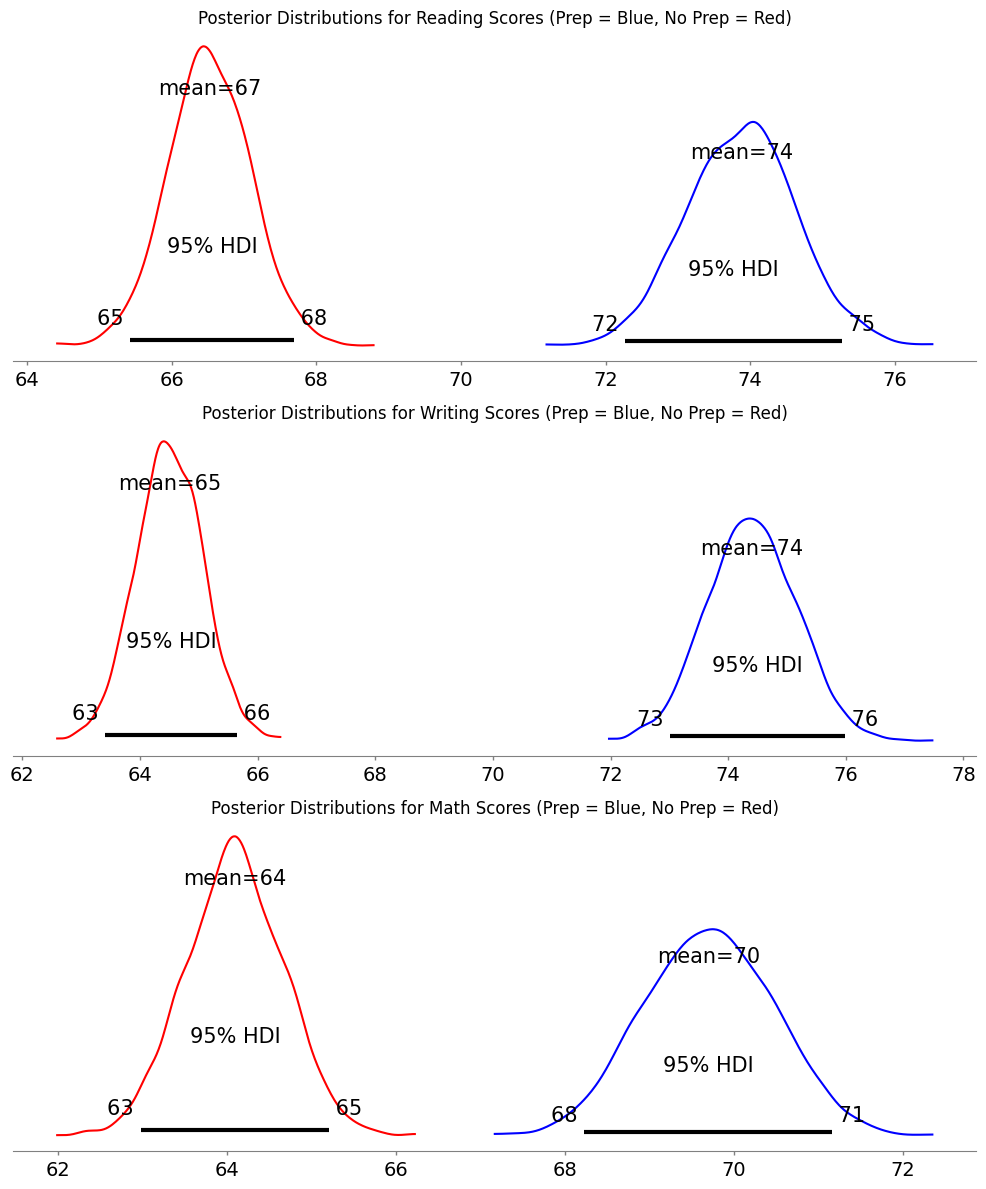

                      mean     sd  hdi_2.5%  hdi_97.5%  mcse_mean  mcse_sd  \
mu_reading_prep     73.875  0.758    72.269     75.264      0.010    0.007   
mu_reading_no_prep  66.526  0.575    65.422     67.696      0.007    0.005   
mu_writing_prep     74.407  0.764    73.010     75.982      0.010    0.007   
mu_writing_no_prep  64.503  0.571    63.411     65.649      0.008    0.006   
mu_math_prep        69.705  0.769    68.223     71.156      0.011    0.008   
mu_math_no_prep     64.093  0.579    62.979     65.207      0.007    0.005   

                    ess_bulk  ess_tail  r_hat  
mu_reading_prep       5875.0    3346.0    1.0  
mu_reading_no_prep    6633.0    3225.0    1.0  
mu_writing_prep       5364.0    3130.0    1.0  
mu_writing_no_prep    5222.0    3315.0    1.0  
mu_math_prep          5190.0    3076.0    1.0  
mu_math_no_prep       6660.0    3233.0    1.0  


In [22]:
import pymc as pm
import pandas as pd
import arviz as az
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('Student.csv')

# Convert 'test preparation course' to a binary variable (1 if completed, 0 if none)
data['test_prep_binary'] = data['test _preparation_course'].apply(lambda x: 1 if x == 'completed' else 0)

# Extract test scores based on test preparation status (1 = completed, 0 = none)
reading_scores_prep = data[data['test_prep_binary'] == 1]['reading score'].values
reading_scores_no_prep = data[data['test_prep_binary'] == 0]['reading score'].values

writing_scores_prep = data[data['test_prep_binary'] == 1]['writing score'].values
writing_scores_no_prep = data[data['test_prep_binary'] == 0]['writing score'].values

math_scores_prep = data[data['test_prep_binary'] == 1]['math_score'].values
math_scores_no_prep = data[data['test_prep_binary'] == 0]['math_score'].values

# Bayesian model for the impact of test preparation on reading, writing, and math scores
with pm.Model() as test_prep_model:
    # Priors for the means of each group
    mu_reading_prep = pm.Normal('mu_reading_prep', mu=70, sigma=10)
    mu_reading_no_prep = pm.Normal('mu_reading_no_prep', mu=65, sigma=10)
    mu_writing_prep = pm.Normal('mu_writing_prep', mu=70, sigma=10)
    mu_writing_no_prep = pm.Normal('mu_writing_no_prep', mu=65, sigma=10)
    mu_math_prep = pm.Normal('mu_math_prep', mu=70, sigma=10)
    mu_math_no_prep = pm.Normal('mu_math_no_prep', mu=65, sigma=10)

    # Shared prior for the standard deviations of the scores
    sigma = pm.HalfNormal('sigma', sigma=10)

    # Likelihood for reading scores
    reading_prep_obs = pm.Normal('reading_prep_obs', mu=mu_reading_prep, sigma=sigma, observed=reading_scores_prep)
    reading_no_prep_obs = pm.Normal('reading_no_prep_obs', mu=mu_reading_no_prep, sigma=sigma, observed=reading_scores_no_prep)

    # Likelihood for writing scores
    writing_prep_obs = pm.Normal('writing_prep_obs', mu=mu_writing_prep, sigma=sigma, observed=writing_scores_prep)
    writing_no_prep_obs = pm.Normal('writing_no_prep_obs', mu=mu_writing_no_prep, sigma=sigma, observed=writing_scores_no_prep)

    # Likelihood for math scores
    math_prep_obs = pm.Normal('math_prep_obs', mu=mu_math_prep, sigma=sigma, observed=math_scores_prep)
    math_no_prep_obs = pm.Normal('math_no_prep_obs', mu=mu_math_no_prep, sigma=sigma, observed=math_scores_no_prep)

    # Inference: Sample from the posterior distribution
    trace_test_prep = pm.sample(2000, tune=1000, return_inferencedata=True)

# Create subplots to customize the colors
fig, ax = plt.subplots(3, 1, figsize=(10, 12))

# Plot reading scores for prep and no prep with different colors
az.plot_posterior(trace_test_prep, var_names=['mu_reading_prep'], hdi_prob=0.95, color='blue', ax=ax[0])
az.plot_posterior(trace_test_prep, var_names=['mu_reading_no_prep'], hdi_prob=0.95, color='red', ax=ax[0])
ax[0].set_title('Posterior Distributions for Reading Scores (Prep = Blue, No Prep = Red)')

# Plot writing scores for prep and no prep with different colors
az.plot_posterior(trace_test_prep, var_names=['mu_writing_prep'], hdi_prob=0.95, color='blue', ax=ax[1])
az.plot_posterior(trace_test_prep, var_names=['mu_writing_no_prep'], hdi_prob=0.95, color='red', ax=ax[1])
ax[1].set_title('Posterior Distributions for Writing Scores (Prep = Blue, No Prep = Red)')

# Plot math scores for prep and no prep with different colors
az.plot_posterior(trace_test_prep, var_names=['mu_math_prep'], hdi_prob=0.95, color='blue', ax=ax[2])
az.plot_posterior(trace_test_prep, var_names=['mu_math_no_prep'], hdi_prob=0.95, color='red', ax=ax[2])
ax[2].set_title('Posterior Distributions for Math Scores (Prep = Blue, No Prep = Red)')

# Display the plot
plt.tight_layout()
plt.show()

# Summarize the posterior distributions
summary_prep = az.summary(trace_test_prep, var_names=['mu_reading_prep', 'mu_reading_no_prep',
                                                      'mu_writing_prep', 'mu_writing_no_prep',
                                                      'mu_math_prep', 'mu_math_no_prep'], hdi_prob=0.95)
print(summary_prep)


**Interpreting Results for Impact of test preparation on student performance (Model-4):**

**Credible Interval (HDI) Analysis:**


**Reading Scores:**



*   **Prep Group (73.87):** The 95% HDI for students who completed the test preparation course is [72.26, 75.26], meaning the true mean reading score for this group is likely to fall within this range.
*   **No Prep Group (66.52):** The 95% HDI for students who did not complete the test preparation course is [65.42, 67.69].

**No Overlap in HDI:** The intervals do not overlap, which suggests a credible difference between the two groups. Students who completed test preparation tend to have significantly higher reading scores than those who did not.


**Writing Scores:**


*   **Prep Group (74.40):**The 95% HDI for the writing scores of students who completed the test preparation is [73.01, 75.98].
*   **No Prep Group (64.50):** The 95% HDI for students who did not complete the preparation is [63.41, 65.64].

**No Overlap in HDI:** Again, there is no overlap between the intervals, suggesting a strong and credible difference between the two groups. Students with test preparation tend to perform better in writing, with an approximate difference of 10 points in mean scores.

**Math Scores:**


*   **Prep Group (69.70):** The 95% HDI for students who completed the preparation course is [68.22, 71.15].
*   **No Prep Group (64.09):** The 95% HDI for students without preparation is [62.98, 65.21].


**No Overlap in HDI:** Once again, the intervals do not overlap, suggesting a credible difference in math scores between the two groups. The test preparation group scores about 5.6 points higher on average.

**Summary of Key Findings:**

**Statistically Credible Differences:**

The credible intervals (HDI) for all subjects (reading, writing, and math) do not overlap between the groups, which suggests that the difference between students who completed test preparation and those who did not is statistically credible. This indicates that test preparation has a positive impact on student performance across all three subjects.

**Magnitude of Differences:**

The **reading** scores show a **7.35-point difference** in the mean between the prep and no-prep groups, with **test-prep students scoring higher**.
The **writing** scores show an even larger difference, approximately **10 points**, which suggests that **test preparation has the most significant effect** on writing scores.
The **math** scores show a **5.6-point difference**, indicating that test preparation has a positive but slightly smaller effect on math performance compared to reading and writing.




# **Model-5 (Weakly Informative prior): Bayesian analysis to compare performance differences across race/ethnicity groups for all three subjects: reading, writing, and math.**

**Bayesian Approach:**
I will model the scores for each race/ethnicity group as coming from Normal distributions with sames means and shared standard deviations.

**Why share same means:** If there isn't specific domain knowledge or prior data suggesting that different race/ethnicity groups should have different mean test scores, it's often best to use a common prior for the means across all groups. This allows the data to drive the inference without imposing assumptions that may bias the results

We will estimate the posterior distributions of the mean scores for each race/ethnicity group for each subject (reading, writing, math).
We will use credible intervals to assess whether the differences between the groups are significant.

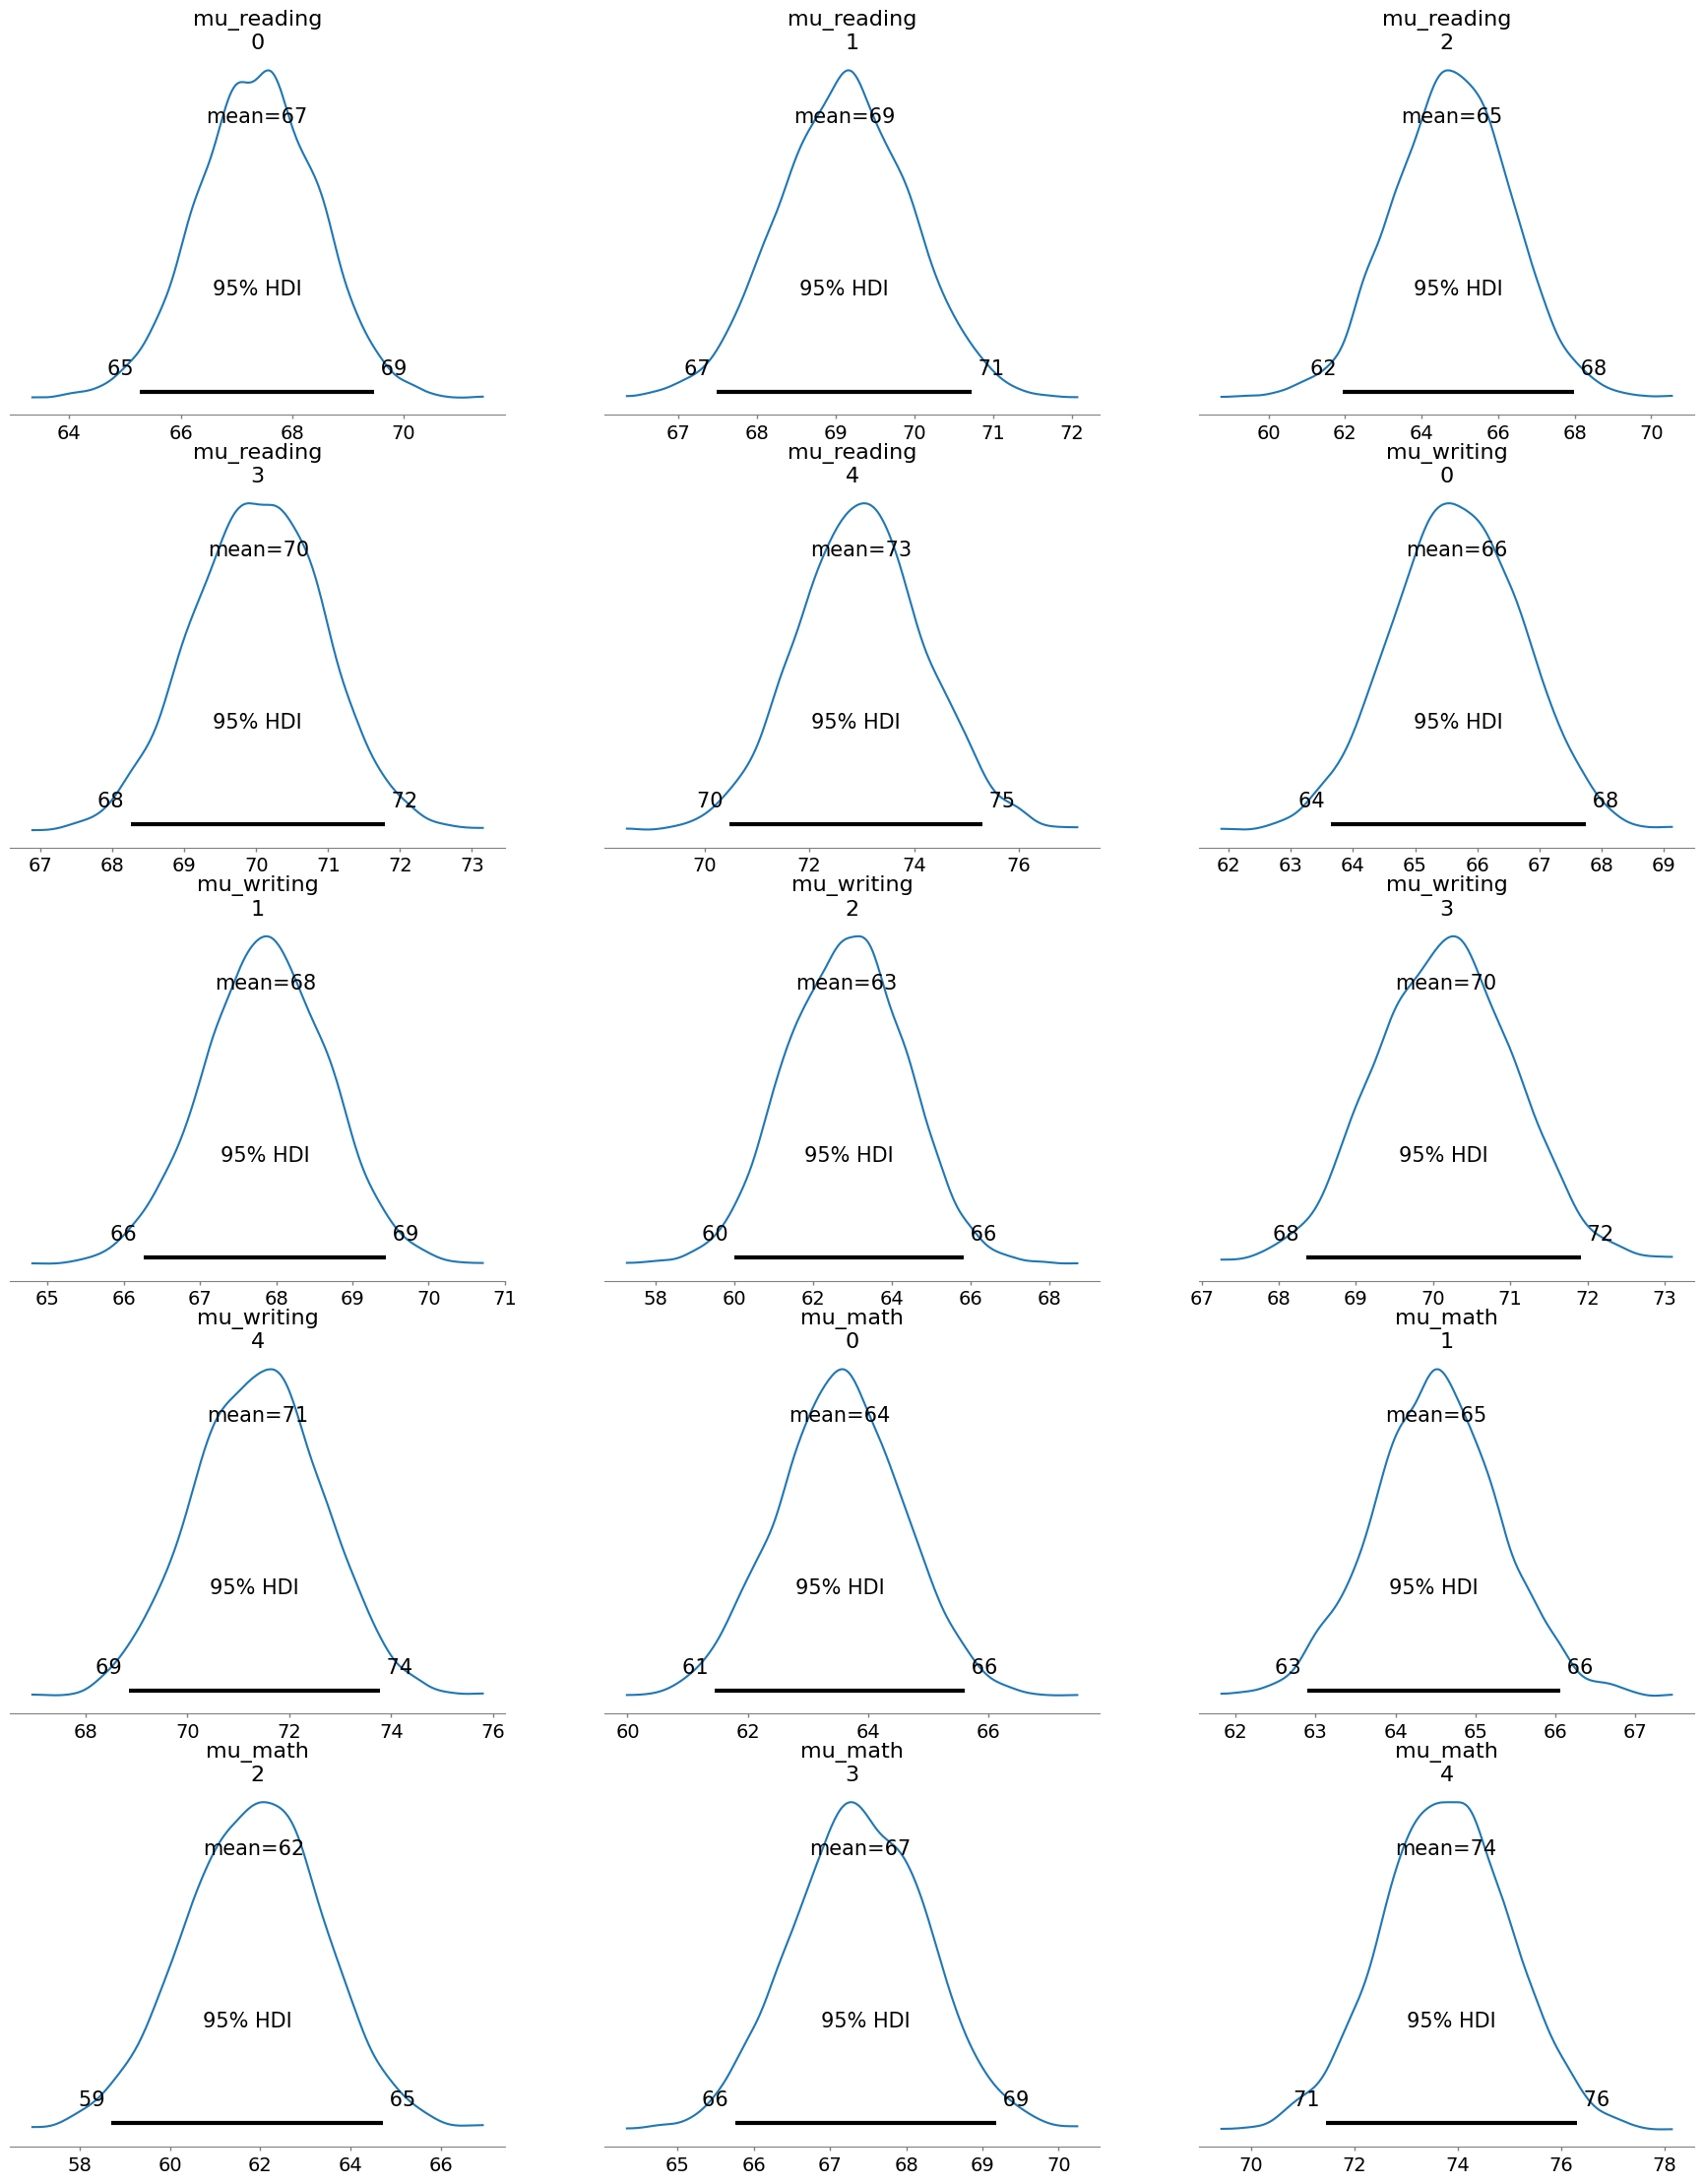

                 mean     sd  hdi_2.5%  hdi_97.5%  mcse_mean  mcse_sd  \
mu_reading[0]  67.372  1.078    65.272     69.469      0.012    0.009   
mu_reading[1]  69.110  0.831    67.492     70.718      0.010    0.007   
mu_reading[2]  64.791  1.552    61.934     67.994      0.017    0.012   
mu_reading[3]  70.027  0.911    68.250     71.785      0.010    0.007   
mu_reading[4]  72.988  1.234    70.478     75.310      0.014    0.010   
mu_writing[0]  65.664  1.056    63.652     67.748      0.013    0.009   
mu_writing[1]  67.854  0.812    66.258     69.443      0.009    0.007   
mu_writing[2]  62.838  1.510    59.992     65.820      0.017    0.012   
mu_writing[3]  70.160  0.910    68.351     71.916      0.011    0.007   
mu_writing[4]  71.384  1.273    68.848     73.784      0.015    0.011   
mu_math[0]     63.527  1.061    61.458     65.603      0.013    0.009   
mu_math[1]     64.504  0.809    62.903     66.059      0.009    0.007   
mu_math[2]     61.857  1.534    58.706     64.722  

In [23]:
import pymc as pm
import pandas as pd
import arviz as az
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('Student.csv')

# Extract race/ethnicity categories and test scores
race_ethnicity_groups = data['race/ethnicity'].unique()
reading_scores = {group: data[data['race/ethnicity'] == group]['reading score'].values for group in race_ethnicity_groups}
writing_scores = {group: data[data['race/ethnicity'] == group]['writing score'].values for group in race_ethnicity_groups}
math_scores = {group: data[data['race/ethnicity'] == group]['math_score'].values for group in race_ethnicity_groups}

# Bayesian model for performance differences across race/ethnicity
with pm.Model() as race_model:
    # Priors for the means of each race/ethnicity group
    mu_reading = pm.Normal('mu_reading', mu=70, sigma=10, shape=len(race_ethnicity_groups))
    mu_writing = pm.Normal('mu_writing', mu=70, sigma=10, shape=len(race_ethnicity_groups))
    mu_math = pm.Normal('mu_math', mu=70, sigma=10, shape=len(race_ethnicity_groups))

    # Shared prior for the standard deviations of the scores
    sigma = pm.HalfNormal('sigma', sigma=10)

    # Likelihood for reading scores for each race/ethnicity group
    for i, group in enumerate(race_ethnicity_groups):
        pm.Normal(f'reading_obs_{group}', mu=mu_reading[i], sigma=sigma, observed=reading_scores[group])

    # Likelihood for writing scores for each race/ethnicity group
    for i, group in enumerate(race_ethnicity_groups):
        pm.Normal(f'writing_obs_{group}', mu=mu_writing[i], sigma=sigma, observed=writing_scores[group])

    # Likelihood for math scores for each race/ethnicity group
    for i, group in enumerate(race_ethnicity_groups):
        pm.Normal(f'math_obs_{group}', mu=mu_math[i], sigma=sigma, observed=math_scores[group])

    # Inference: Sample from the posterior distribution
    trace_race = pm.sample(2000, tune=1000, return_inferencedata=True)

# Plot posterior distributions for the means of each subject by race/ethnicity
az.plot_posterior(trace_race, var_names=['mu_reading', 'mu_writing', 'mu_math'], hdi_prob=0.95)
plt.show()

# Summarize the posterior distributions for race/ethnicity performance differences
summary_race = az.summary(trace_race, var_names=['mu_reading', 'mu_writing', 'mu_math'], hdi_prob=0.95)
print(summary_race)


**Interpreting Results for compare performance differences across race/ethnicity groups for all three subjects (Model-5):**

**Interpretation of the Mean Scores:**

The mean scores for each race/ethnicity group vary across subjects. Here's what we can infer:

**Group 4 consistently has the highest mean scores across all three subjects (reading: 72.99, writing: 71.38, math: 73.75).**

**Group 2 has the lowest mean scores across all subjects (reading: 64.79, writing: 62.83, math: 61.85).**

Other groups fall in between, but Group 3 and Group 1 generally perform better than Group 0 and Group 2.

**No Overlap in HDIs:** In many cases, the HDIs between groups do not overlap, indicating that there are credible differences between the groups.

For example, Group 4 (HDI: [70.48, 75.31]) and Group 2 (HDI: [61.93, 67.99]) have non-overlapping HDIs in reading scores, suggesting that Group 4 performs significantly better than Group 2 in reading.

**MCSE (Monte Carlo Standard Error):** The MCSE values are all quite small, ranging from 0.009 to 0.018, indicating that the MCMC process has produced reliable estimates of the posterior means.

**Conclusion:**

**Performance Differences:** Group4 has consistently has the highest mean scores across all subjectes (reading, writing, math) while group2 has lowest scores. These results are backed by the 95% credible intervals, which often do not overlap between groups, suggesting strong and credible differences. The posterior estimates are robust, with well-converged chains and high effective sample sizes.

# **Model-6(Weakly Informative prior): Bayesian analysis to compare Parental Education with Student Performance (parental level of education correlate with student performance):**


**Bayesian Approach:**
We will model the test scores (reading, writing, math) of students based on their parental education levels, assuming that the scores for each education level group come from different Normal distributions.
We will estimate the posterior distributions for the mean scores of each group and use credible intervals to assess whether the differences between groups are significant.



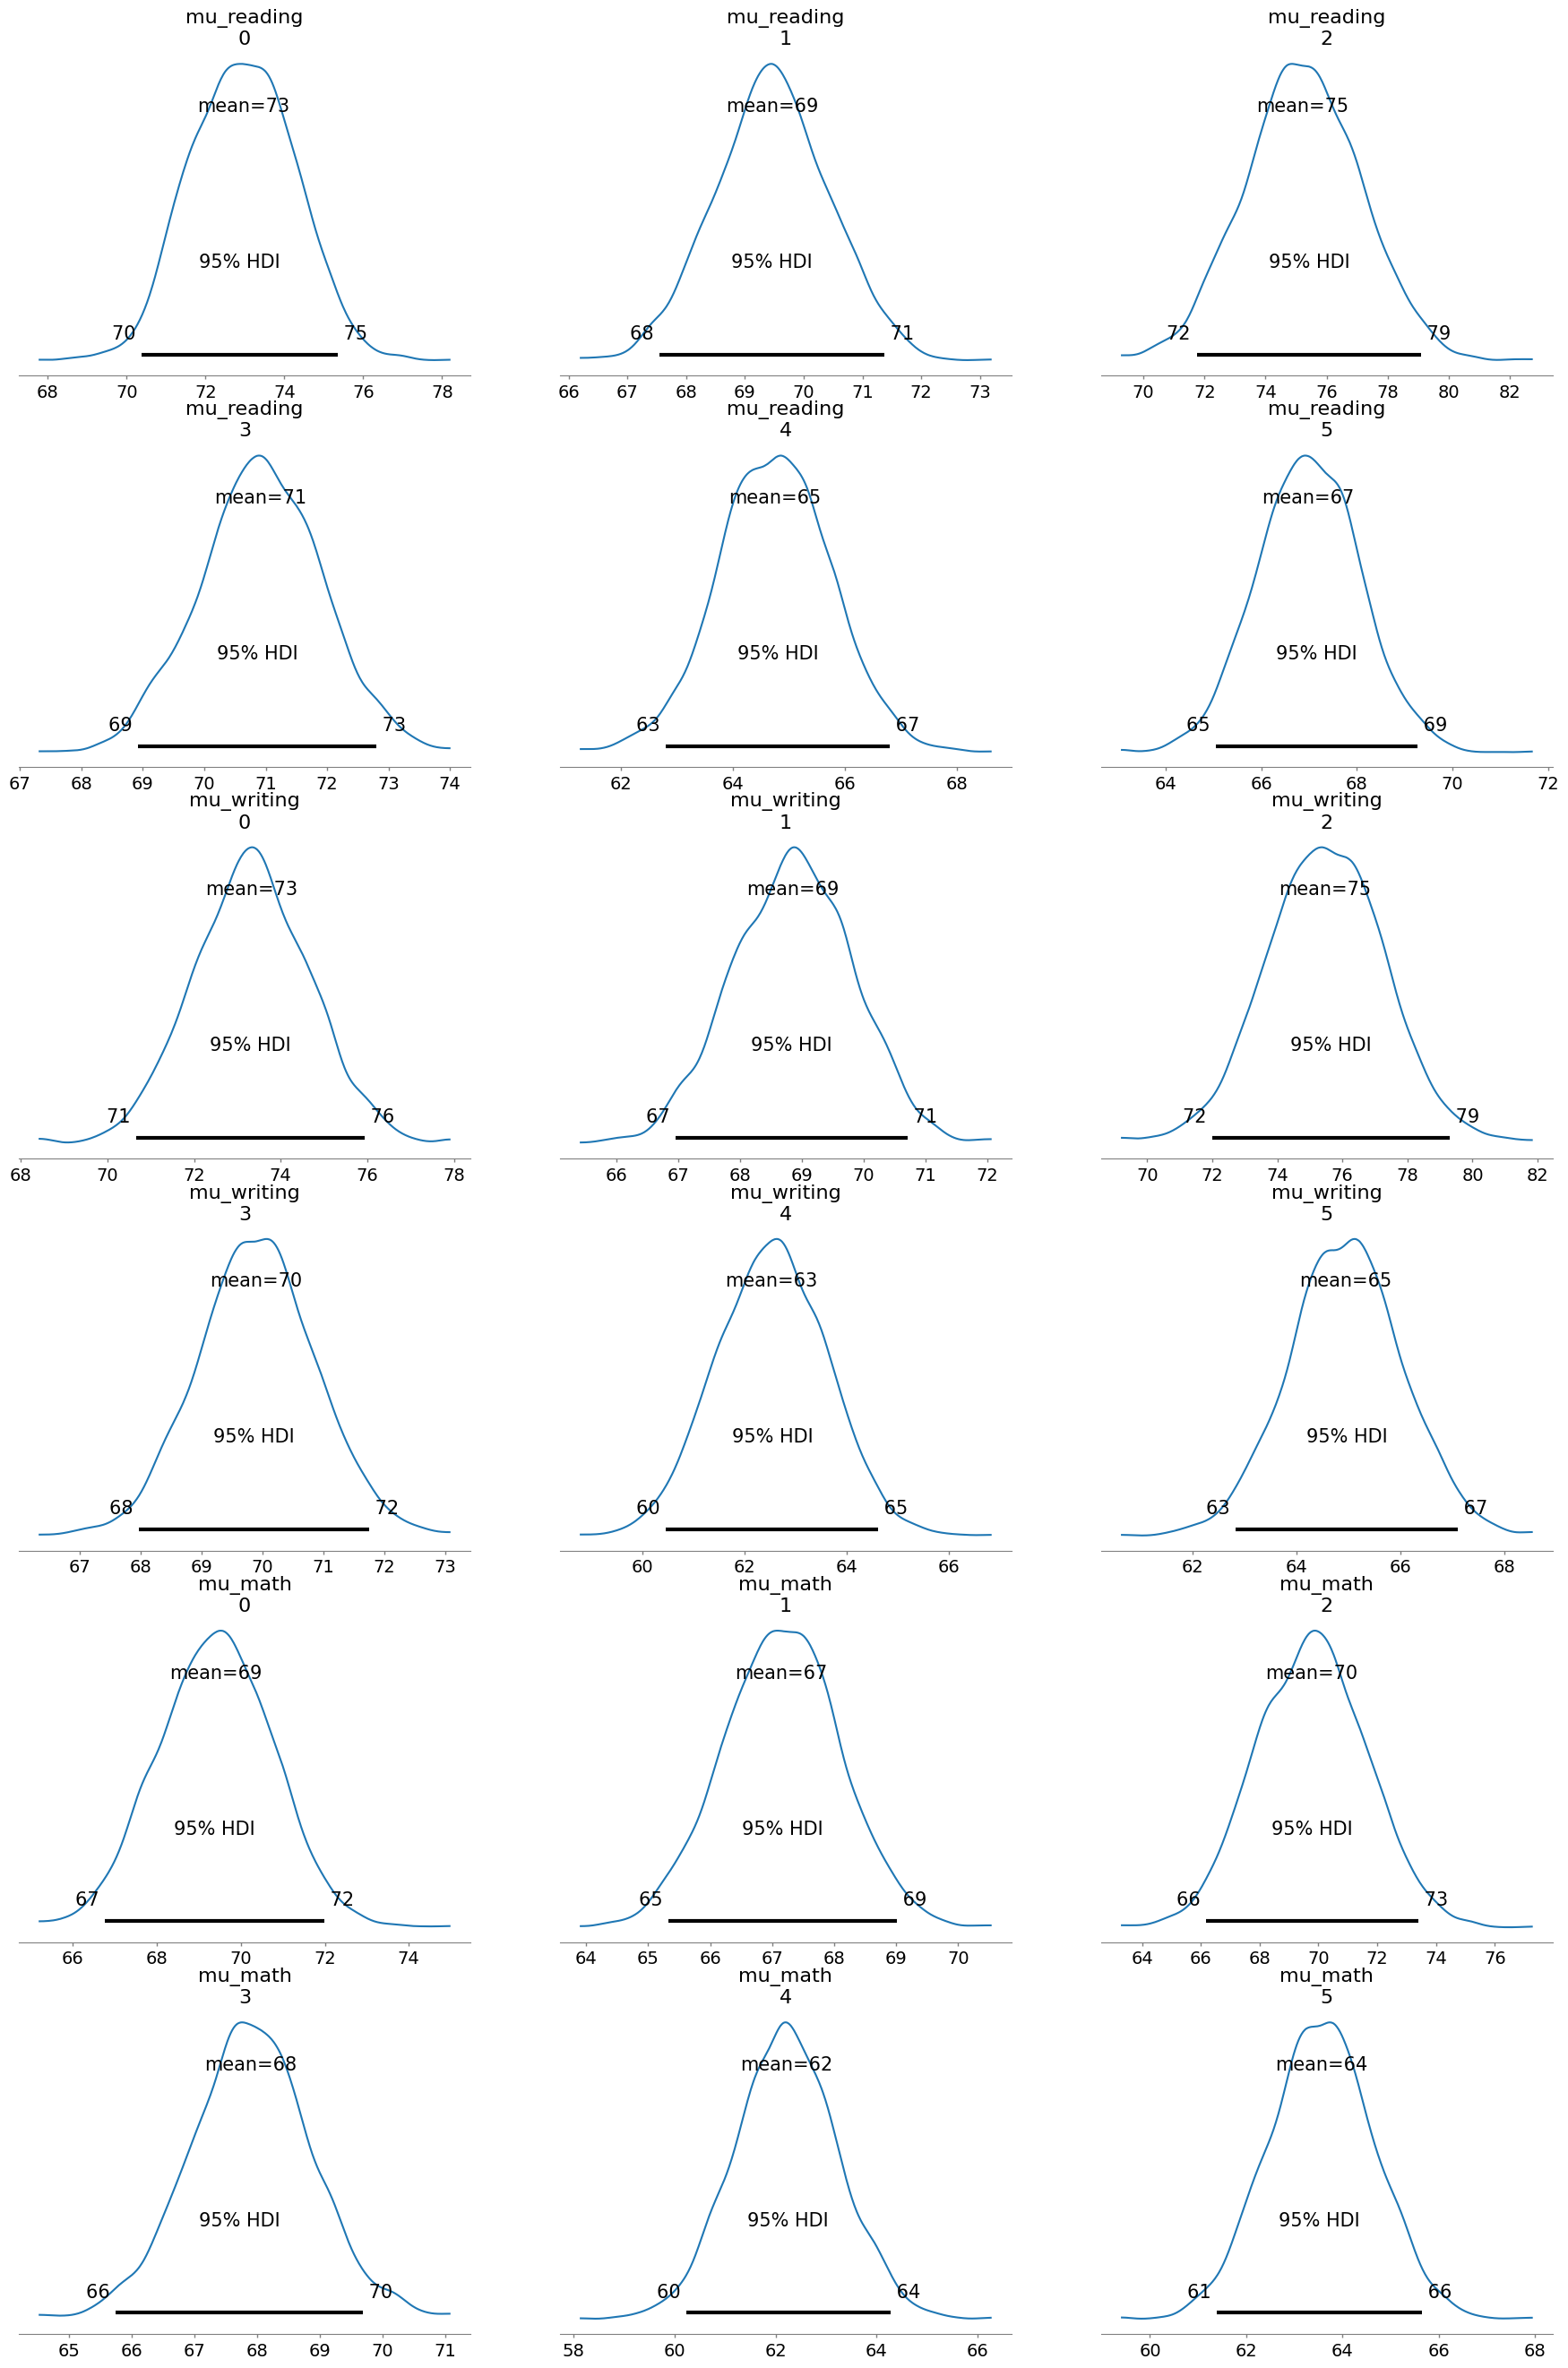

                 mean     sd  hdi_2.5%  hdi_97.5%  mcse_mean  mcse_sd  \
mu_reading[0]  72.952  1.327    70.379     75.366      0.014    0.010   
mu_reading[1]  69.467  0.973    67.539     71.375      0.010    0.007   
mu_reading[2]  75.204  1.903    71.745     79.108      0.022    0.016   
mu_reading[3]  70.921  0.989    68.922     72.798      0.011    0.008   
mu_reading[4]  64.742  1.015    62.804     66.807      0.013    0.009   
mu_reading[5]  66.985  1.073    65.048     69.265      0.012    0.008   
mu_writing[0]  73.332  1.351    70.664     75.939      0.014    0.010   
mu_writing[1]  68.858  0.978    66.957     70.708      0.011    0.007   
mu_writing[2]  75.472  1.851    72.002     79.302      0.019    0.013   
mu_writing[3]  69.899  0.973    67.971     71.759      0.011    0.008   
mu_writing[4]  62.531  1.075    60.470     64.622      0.012    0.009   
mu_writing[5]  64.946  1.092    62.838     67.102      0.012    0.009   
mu_math[0]     69.393  1.365    66.758     71.997  

In [31]:
import pymc as pm
import pandas as pd
import arviz as az
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('Student.csv')

# Extract parental education categories and test scores
parental_education_groups = data['parental level of education'].unique()
reading_scores = {group: data[data['parental level of education'] == group]['reading score'].values for group in parental_education_groups}
writing_scores = {group: data[data['parental level of education'] == group]['writing score'].values for group in parental_education_groups}
math_scores = {group: data[data['parental level of education'] == group]['math_score'].values for group in parental_education_groups}

# Bayesian model for performance differences across parental education levels
with pm.Model() as parental_education_model:
    # Priors for the means of each parental education group
    mu_reading = pm.Normal('mu_reading', mu=70, sigma=10, shape=len(parental_education_groups))
    mu_writing = pm.Normal('mu_writing', mu=70, sigma=10, shape=len(parental_education_groups))
    mu_math = pm.Normal('mu_math', mu=70, sigma=10, shape=len(parental_education_groups))

    # Shared prior for the standard deviations of the scores
    sigma = pm.HalfNormal('sigma', sigma=10)

    # Likelihood for reading scores for each parental education group
    for i, group in enumerate(parental_education_groups):
        pm.Normal(f'reading_obs_{group}', mu=mu_reading[i], sigma=sigma, observed=reading_scores[group])

    # Likelihood for writing scores for each parental education group
    for i, group in enumerate(parental_education_groups):
        pm.Normal(f'writing_obs_{group}', mu=mu_writing[i], sigma=sigma, observed=writing_scores[group])

    # Likelihood for math scores for each parental education group
    for i, group in enumerate(parental_education_groups):
        pm.Normal(f'math_obs_{group}', mu=mu_math[i], sigma=sigma, observed=math_scores[group])

    # Inference: Sample from the posterior distribution
    trace_parental_education = pm.sample(2000, tune=1000, return_inferencedata=True)

# Plot posterior distributions for the means of each subject by parental education
az.plot_posterior(trace_parental_education, var_names=['mu_reading', 'mu_writing', 'mu_math'], hdi_prob=0.95)
plt.show()

# Summarize the posterior distributions for parental education performance differences
summary_parental_education = az.summary(trace_parental_education, var_names=['mu_reading', 'mu_writing', 'mu_math'], hdi_prob=0.95)
print(summary_parental_education)


**Interpreting Results for Bayesian analysis to compare Parental Education with Student Performance for all three subjects (Model-6):**

**Mean Scores:**

The mean column gives the estimated mean score for each parental education group. Here’s a breakdown of the highest and lowest performing groups across subjects:

**Reading:**


*   Highest Mean: mu_reading[2] (Group 2) with a mean score of 75.20.
*   Lowest Mean: mu_reading[4] (Group 4) with a mean score of 64.74.


**Writing:**


*   Highest Mean: mu_writing[2] (Group 2) with a mean score of 75.47.
*   Lowest Mean: mu_writing[4] (Group 4) with a mean score of 62.53.


**Math:**


*   Highest Mean: mu_math[0] (Group 0) with a mean score of 69.39.
*   Lowest Mean: mu_math[4] (Group 4) with a mean score of 62.22.

**Non-overlapping HDIs:**

The credible intervals do not overlap between certain groups, which indicates a credible (statistically significant) difference. For instance, mu_reading[2] (Group 2) has an HDI of [71.75, 79.11], which does not overlap with mu_reading[4] (Group 4) with an HDI of [62.80, 66.81]. This suggests that Group 2 (**Masters Degree**) performs significantly better in reading than Group 4 (**High School**).

**Conclusion:**
This Bayesian analysis shows credible differences in student performance based on parental education levels. In particular, Group 2 (**Masters Degree**) consistently performs better in all subjects (reading, writing, and math), while Group 4 (**High School**) has the lowest scores across the board. The credible intervals and the lack of overlap between certain groups suggest that these differences are statistically significant.

# **Model-7(Non-Informative Prior): Bayesian analysis to compare Parental Education with Student Performance (parental level of education correlate with student performance):**

**Bayesian Approach:** We will model the test scores (reading, writing, math) of students based on their parental education levels, assuming that the scores for each education level group come from different Normal distributions. We will estimate the posterior distributions for the mean scores of each group and use credible intervals to assess whether the differences between groups are significant.

**Here’s how to adjust the model to use non-informative priors:**

**Adjustments:**
For the means, we will use a wide Normal distribution that doesn't center the mean around 70 but rather allows the entire range to be possible. For example, a Normal(0, 1000) is a very broad prior.
For the standard deviation, we can replace the **HalfNormal(10) with a HalfCauchy(10)**, which is often used as a non-informative prior for scale parameters (it allows much wider values for the standard deviation).

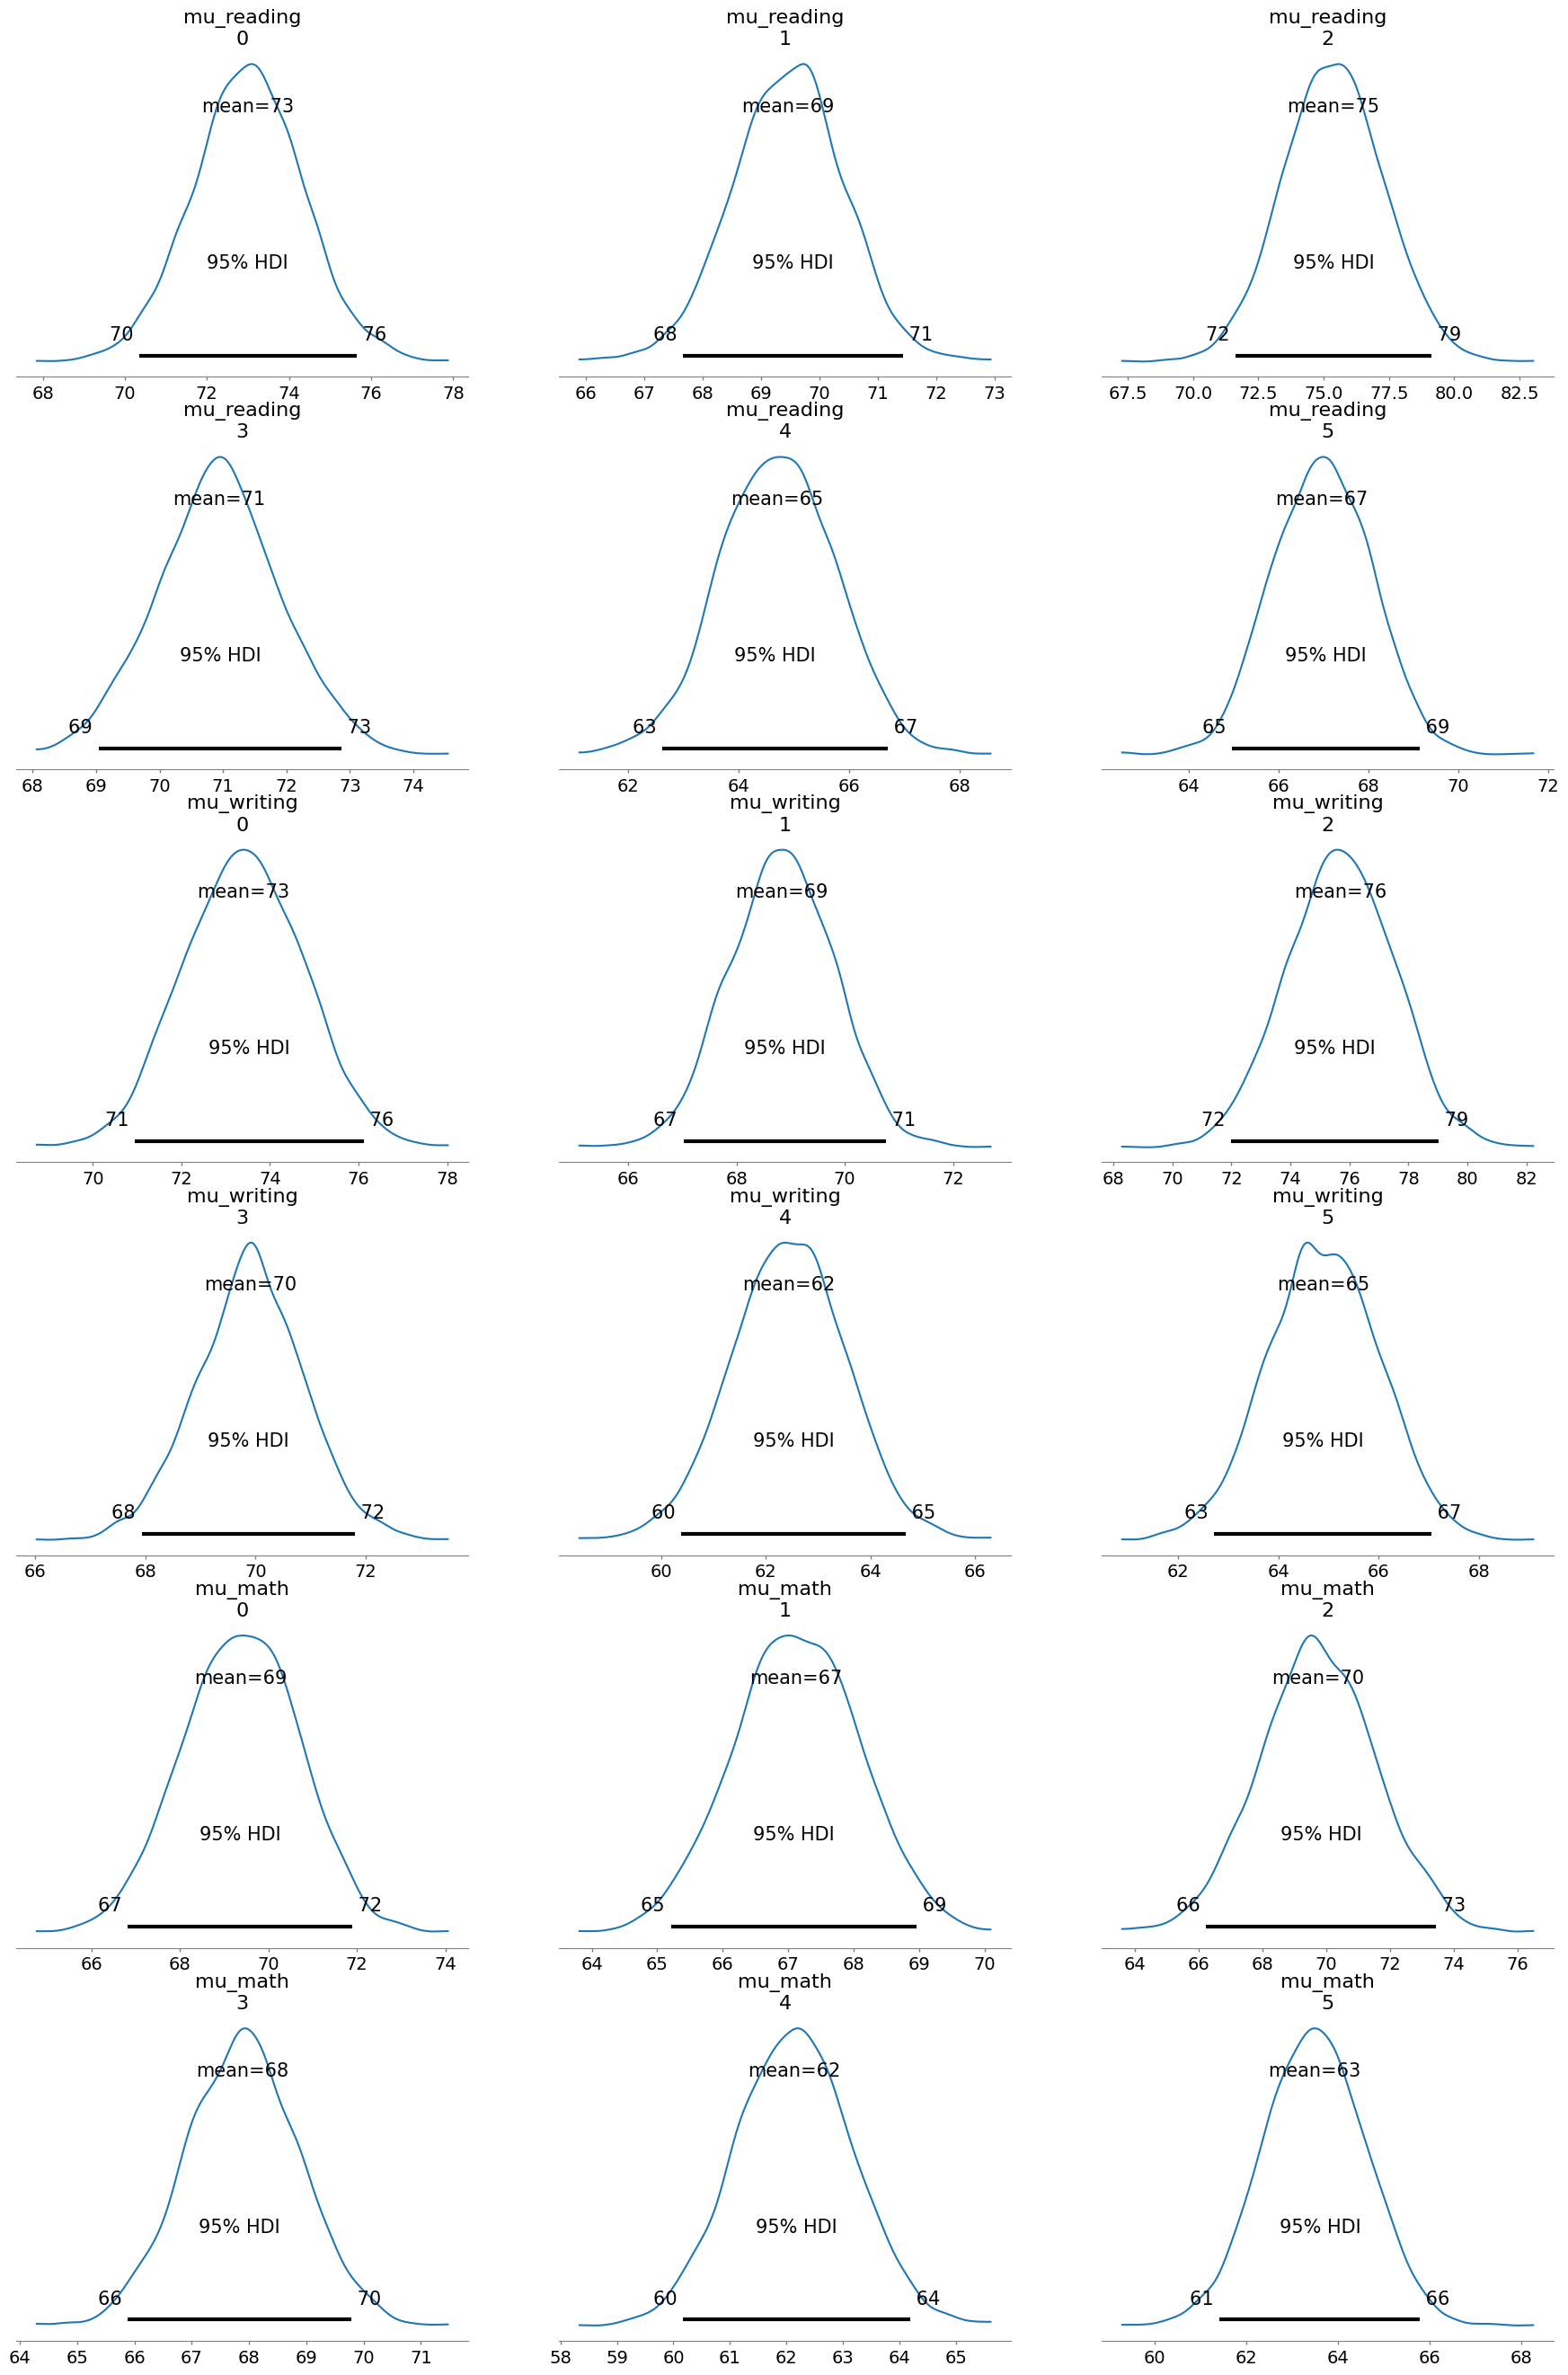

                 mean     sd  hdi_2.5%  hdi_97.5%  mcse_mean  mcse_sd  \
mu_reading[0]  72.998  1.346    70.351     75.643      0.014    0.010   
mu_reading[1]  69.468  0.964    67.670     71.437      0.010    0.007   
mu_reading[2]  75.378  1.932    71.641     79.126      0.020    0.014   
mu_reading[3]  70.931  0.975    69.039     72.872      0.010    0.007   
mu_reading[4]  64.697  1.051    62.624     66.695      0.011    0.008   
mu_reading[5]  66.963  1.103    64.971     69.143      0.012    0.009   
mu_writing[0]  73.399  1.348    70.943     76.114      0.014    0.010   
mu_writing[1]  68.838  0.974    67.021     70.758      0.010    0.007   
mu_writing[2]  75.680  1.817    71.979     79.009      0.020    0.014   
mu_writing[3]  69.905  0.984    67.934     71.809      0.010    0.007   
mu_writing[4]  62.436  1.096    60.393     64.679      0.012    0.009   
mu_writing[5]  64.889  1.117    62.718     67.060      0.012    0.009   
mu_math[0]     69.379  1.325    66.817     71.894  

In [20]:
import pymc as pm
import pandas as pd
import arviz as az
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('Student.csv')

# Extract parental education categories and test scores
parental_education_groups = data['parental level of education'].unique()
reading_scores = {group: data[data['parental level of education'] == group]['reading score'].values for group in parental_education_groups}
writing_scores = {group: data[data['parental level of education'] == group]['writing score'].values for group in parental_education_groups}
math_scores = {group: data[data['parental level of education'] == group]['math_score'].values for group in parental_education_groups}

# Bayesian model for performance differences across parental education levels
with pm.Model() as parental_education_model:
    # Non-informative priors for the means of each parental education group
    mu_reading = pm.Normal('mu_reading', mu=0, sigma=1000, shape=len(parental_education_groups))
    mu_writing = pm.Normal('mu_writing', mu=0, sigma=1000, shape=len(parental_education_groups))
    mu_math = pm.Normal('mu_math', mu=0, sigma=1000, shape=len(parental_education_groups))

    # Non-informative prior for the standard deviations of the scores
    sigma = pm.HalfCauchy('sigma', beta=10)

    # Likelihood for reading scores for each parental education group
    for i, group in enumerate(parental_education_groups):
        pm.Normal(f'reading_obs_{group}', mu=mu_reading[i], sigma=sigma, observed=reading_scores[group])

    # Likelihood for writing scores for each parental education group
    for i, group in enumerate(parental_education_groups):
        pm.Normal(f'writing_obs_{group}', mu=mu_writing[i], sigma=sigma, observed=writing_scores[group])

    # Likelihood for math scores for each parental education group
    for i, group in enumerate(parental_education_groups):
        pm.Normal(f'math_obs_{group}', mu=mu_math[i], sigma=sigma, observed=math_scores[group])

    # Inference: Sample from the posterior distribution
    trace_parental_education = pm.sample(2000, tune=1000, return_inferencedata=True)

# Plot posterior distributions for the means of each subject by parental education
az.plot_posterior(trace_parental_education, var_names=['mu_reading', 'mu_writing', 'mu_math'], hdi_prob=0.95)
plt.show()

# Summarize the posterior distributions for parental education performance differences
summary_parental_education = az.summary(trace_parental_education, var_names=['mu_reading', 'mu_writing', 'mu_math'], hdi_prob=0.95)
print(summary_parental_education)


**Comparison Between Non-Informative and Weakly Informative Priors:**

**1. Mean Values:**

In both the non-informative and weakly informative models, the mean estimates for the group parameters (e.g., mu_reading[0], mu_writing[1], etc.) are very close, but not exactly the same.
The differences in the means between the **two models are small, which indicates that the data largely dominates the results.** However, the weakly informative priors provide slightly more constrained estimates, especially in cases with less data.

**2. Standard Deviation (sd):**

The standard deviations (uncertainty around the mean) are very similar across both models, but you can notice slightly more constrained estimates with the weakly informative priors.
For example, the standard deviation for mu_reading[2] under the **non-informative prior is 1.932, while it is 1.903 with the weakly informative prior.**
This shows that **weakly informative priors add a bit more stability to the model **by slightly narrowing the uncertainty, though the data still plays the most significant role in driving the results.

**3. Credible Intervals (HDI 2.5% and HDI 97.5%):**

The credible intervals for both models are quite similar, but there are minor differences in the boundaries. For example:
For mu_reading[0], the HDI in the non-informative model is [70.351, 75.643], while in the weakly informative model, it is [70.379, 75.366].
These slight shifts in the intervals suggest that the **weakly informative prior provides a small amount of regularization**, making the credible intervals a bit tighter, though the differences are marginal.

**4. Monte Carlo Standard Errors (mcse_mean and mcse_sd):**
The mcse_mean and mcse_sd values are also very close between the two models, but generally, the weakly informative prior leads to slightly smaller Monte Carlo standard errors. **This implies that the sampling process was a bit more efficient with weakly informative priors**, likely because the priors constrained the parameter space more effectively.

**In both models, the data plays the most significant role, but the weakly informative priors help provide better convergence and slightly more reliable estimates.**

# **Model-8 (Conjugate Prior): Normal Likelihood (for Continuous Data) with Conjugate Priors: "Reading Scores by Gender: Use Normal-Inverse-Gamma priors for the means and variances of reading scores for male and female students.":**

The test scores (reading, writing, math) are continuous and likely follow a Normal distribution. We can use conjugate priors for models that involve these continuous variables.

**Model**: Normal likelihood with unknown variance

**Conjugate Prior:** Normal-Inverse-Gamma (for both mean and variance)

**Note:** This could be applied for Maths and Writing scores as well. I am using this model for reading scores. **This model can be compared with Model1.**

**Normal likelihood:** We assume that the reading scores come from a Normal distribution.

**Conjugate prior:** The Normal-Inverse-Gamma prior is used for both the mean and the variance.

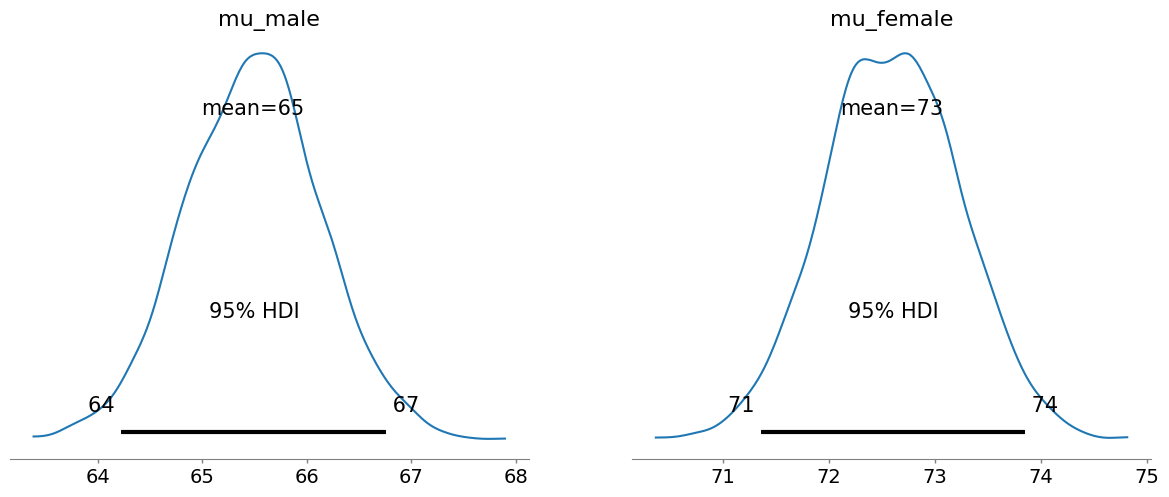

                mean     sd  hdi_2.5%  hdi_97.5%  mcse_mean  mcse_sd  \
mu_male       65.486  0.645    64.228     66.758      0.009    0.006   
mu_female     72.596  0.639    71.363     73.853      0.008    0.005   
sigma_male    13.862  0.457    13.003     14.795      0.005    0.004   
sigma_female  14.300  0.441    13.460     15.168      0.005    0.004   

              ess_bulk  ess_tail  r_hat  
mu_male         5533.0    3086.0    1.0  
mu_female       7112.0    3293.0    1.0  
sigma_male      7921.0    3246.0    1.0  
sigma_female    7279.0    3273.0    1.0  


In [21]:
import pymc as pm
import pandas as pd
import arviz as az
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('Student.csv')

# Extract reading scores by gender
reading_scores_male = data[data['gender'] == 'male']['reading score'].values
reading_scores_female = data[data['gender'] == 'female']['reading score'].values

# Bayesian model for reading scores by gender using Normal-Inverse-Gamma conjugate priors
with pm.Model() as reading_gender_model:
    # Priors for the variances (Inverse-Gamma)
    tau_male = pm.InverseGamma('tau_male', alpha=3, beta=2)  # Inverse-Gamma prior for male variance
    tau_female = pm.InverseGamma('tau_female', alpha=3, beta=2)  # Inverse-Gamma prior for female variance

    sigma_male = pm.Deterministic('sigma_male', pm.math.sqrt(tau_male))  # Convert tau to standard deviation for males
    sigma_female = pm.Deterministic('sigma_female', pm.math.sqrt(tau_female))  # Convert tau to standard deviation for females

    # Priors for the means (Normal, using tau as the precision)
    mu_male = pm.Normal('mu_male', mu=70, sigma=sigma_male)  # Normal prior for male mean
    mu_female = pm.Normal('mu_female', mu=70, sigma=sigma_female)  # Normal prior for female mean

    # Likelihoods for male and female reading scores
    reading_male_obs = pm.Normal('reading_male_obs', mu=mu_male, sigma=sigma_male, observed=reading_scores_male)
    reading_female_obs = pm.Normal('reading_female_obs', mu=mu_female, sigma=sigma_female, observed=reading_scores_female)

    # Inference: Sample from the posterior distribution
    trace_reading_gender = pm.sample(2000, tune=1000, return_inferencedata=True)

# Plot posterior distributions for the means of male and female students
az.plot_posterior(trace_reading_gender, var_names=['mu_male', 'mu_female'], hdi_prob=0.95)
plt.show()

# Summarize the posterior distributions
summary_reading_gender = az.summary(trace_reading_gender, var_names=['mu_male', 'mu_female', 'sigma_male', 'sigma_female'], hdi_prob=0.95)
print(summary_reading_gender)


Let's compare the results between the conjugate prior model (Normal-Inverse Gamma) and the weakly informative prior model **(Model1)** for the student reading scores between genders. The key metrics to compare include:

**1. Mean Values:**

**Conjugate Prior:**

*   Male Mean: 65.49
*   Female Mean: 72.60

**Weakly Informative Prior:**


*   Male Mean: 65.48
*   Female Mean: 72.60


The mean estimates for both priors are almost identical, suggesting that the data is strong enough to dominate the inference, and the choice of prior is not significantly altering the results.

**2. Standard Deviation (sd):**

**Conjugate Prior:**

*   Male: 0.645
*   Female: 0.639

**Weakly Informative Prior:**


*   Male: 0.632
*   Female: 0.619

The standard deviations are also very similar across both models. However, the weakly informative priors have slightly smaller uncertainty (standard deviations), indicating that these priors might provide slightly more precision around the mean estimates.

**3. Credible Intervals (95% HDI):**

**Conjugate Prior:**

*   Male: [64.23, 66.76]
*   Female: [71.36, 73.85]

**Weakly Informative Prior:**


*   Male: [64.22, 66.69]
*   Female: [71.40, 73.86]


The credible intervals between the two models are nearly identical, showing that both priors lead to very similar inferences. In both cases, the intervals suggest that the true means for male and female reading scores differ, with no overlap between the intervals.

**4. Monte Carlo Standard Errors (mcse_mean, mcse_sd):**

**Conjugate Prior:**

*   Male: 0.009 (mcse_mean)
*   Female: 0.008 (mcse_mean)

**Weakly Informative Prior:**


*   Male: 0.008 (mcse_mean)
*   Female: 0.008 (mcse_mean)

The Monte Carlo standard errors are slightly larger for the conjugate prior model than for the weakly informative prior model. This indicates that the weakly informative prior model might have produced slightly more stable estimates during sampling.

**Which One Performed Better?**

If the goal is precision and sampling efficiency, the weakly informative prior model performs slightly better.

If the goal is to use a more traditional conjugate prior structure with analytical convenience and interpretability, the conjugate prior model is a reasonable choice, though it has slightly higher uncertainty and larger Monte Carlo error.



# **Model-9 (Conjugate Prior): Normal Likelihood (for Continuous Data) with Conjugate Priors: Math Scores by Parental Education (Normal-Inverse-Gamma Priors)**

Now, we'll use the same approach for the math scores across different levels of parental education.

Steps:
**Normal likelihood:** Assume that math scores follow a Normal distribution.

**Conjugate prior:** The Normal-Inverse-Gamma prior for both the mean and variance.



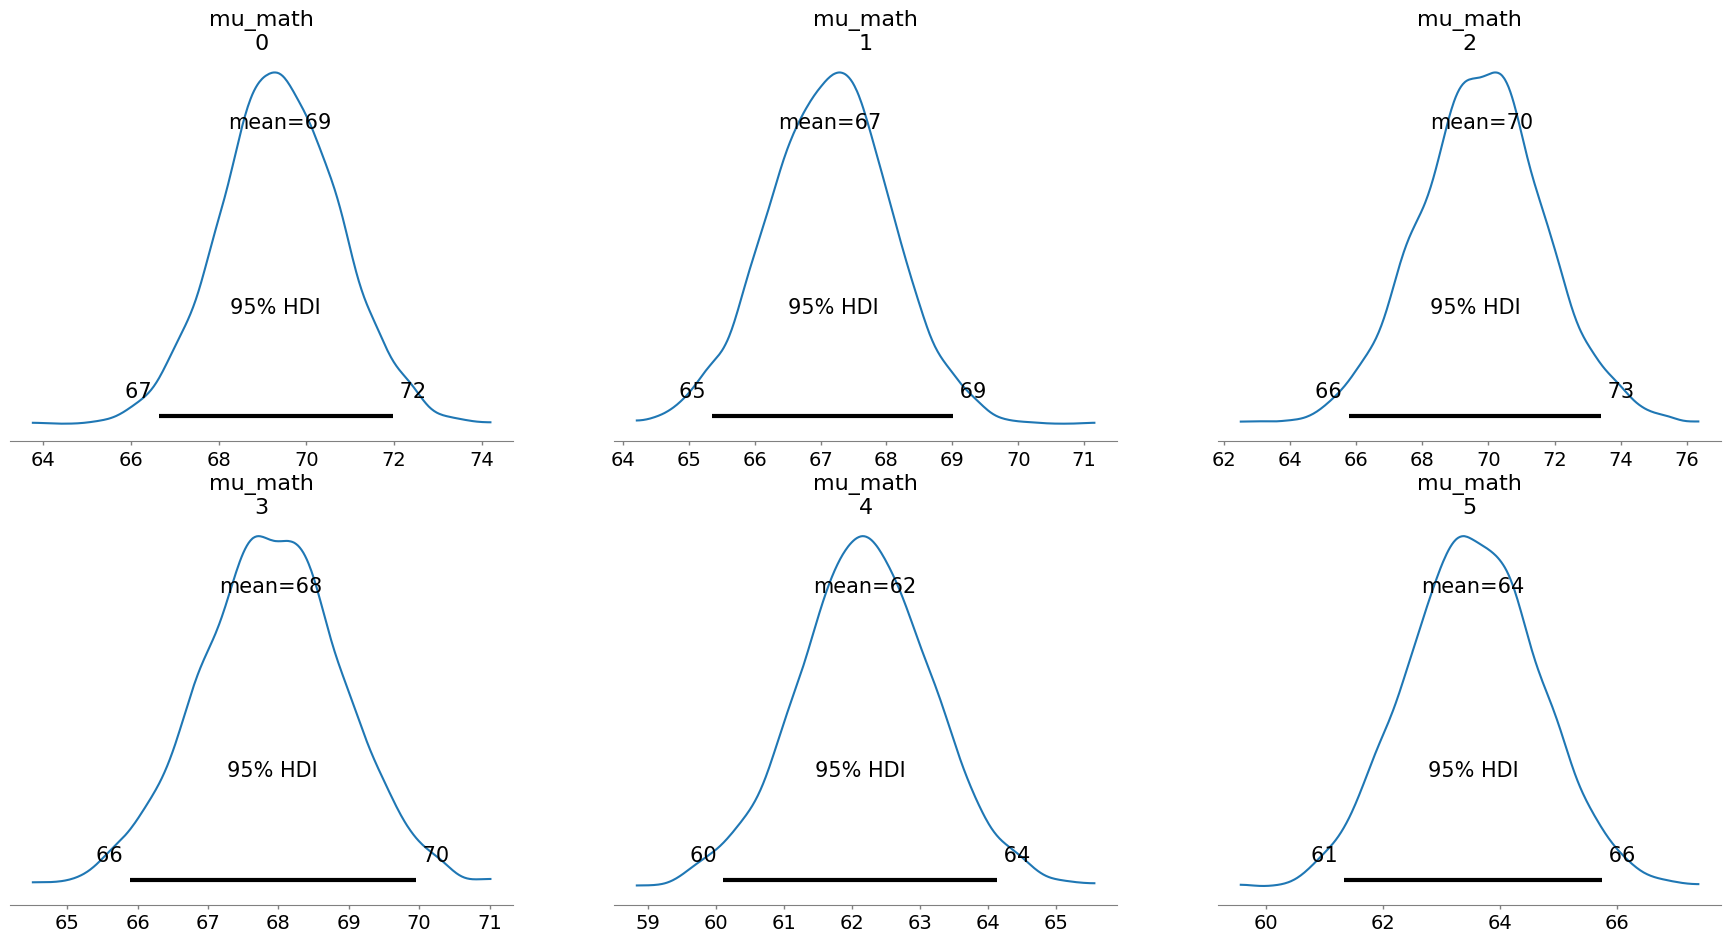

              mean     sd  hdi_2.5%  hdi_97.5%  mcse_mean  mcse_sd  ess_bulk  \
mu_math[0]  69.403  1.351    66.635     71.967      0.016    0.011    7036.0   
mu_math[1]  67.140  0.923    65.358     69.017      0.013    0.009    5343.0   
mu_math[2]  69.789  1.918    65.780     73.405      0.026    0.018    5610.0   
mu_math[3]  67.895  1.024    65.887     69.953      0.014    0.010    5690.0   
mu_math[4]  62.190  1.002    60.101     64.125      0.013    0.010    5556.0   
mu_math[5]  63.534  1.139    61.331     65.738      0.014    0.010    6407.0   
sigma[0]    14.589  0.929    12.860     16.427      0.012    0.008    6248.0   
sigma[1]    14.148  0.653    12.803     15.397      0.009    0.006    5370.0   
sigma[2]    14.488  1.306    12.075     17.068      0.018    0.013    5654.0   
sigma[3]    14.930  0.701    13.668     16.355      0.009    0.006    6894.0   
sigma[4]    14.355  0.719    12.961     15.781      0.009    0.007    6179.0   
sigma[5]    15.703  0.811    14.209     

In [23]:
# Extract parental education groups and math scores
parental_education_groups = data['parental level of education'].unique()
math_scores = {group: data[data['parental level of education'] == group]['math_score'].values for group in parental_education_groups}

# Bayesian model for math scores by parental education using Normal-Inverse-Gamma conjugate priors
with pm.Model() as math_parental_education_model:
    # Priors for the variances (Inverse-Gamma)
    tau = pm.InverseGamma('tau', alpha=3, beta=2, shape=len(parental_education_groups))  # Inverse-Gamma prior for variance
    sigma = pm.Deterministic('sigma', pm.math.sqrt(tau))  # Convert tau to standard deviation

    # Priors for the means (Normal)
    mu_math = pm.Normal('mu_math', mu=70, sigma=sigma, shape=len(parental_education_groups))  # Normal prior for means

    # Likelihood for math scores for each parental education group
    for i, group in enumerate(parental_education_groups):
        pm.Normal(f'math_obs_{group}', mu=mu_math[i], sigma=sigma[i], observed=math_scores[group])

    # Inference: Sample from the posterior distribution
    trace_math_parental_education = pm.sample(2000, tune=1000, return_inferencedata=True)

# Plot posterior distributions for the means of math scores by parental education
az.plot_posterior(trace_math_parental_education, var_names=['mu_math'], hdi_prob=0.95)
plt.show()

# Summarize the posterior distributions
summary_math_parental_education = az.summary(trace_math_parental_education, var_names=['mu_math', 'sigma'], hdi_prob=0.95)
print(summary_math_parental_education)


Interpreting Results for Bayesian analysis to compare Parental Education with Student Performance for Math subject (Model-9):

**Analysis of Mean Math Scores (mu_math):**

Group 0: Mean = 69.40, HDI = [66.64, 71.97]
This group has a relatively high mean math score compared to other groups.

**Group 1: Mean = 67.14, HDI = [65.36, 69.02]**

Slightly lower mean than Group 0, but still in a reasonably high range.

**Group 2: Mean = 69.79, HDI = [65.78, 73.41]**

This group has the highest mean math score, but the wide HDI suggests greater uncertainty in the estimate.

**Group 3: Mean = 67.90, HDI = [65.89, 69.95]**

Similar to Group 1, with a solid mean math score and relatively narrow credible interval.

**Group 4: Mean = 62.19, HDI = [60.10, 64.13]**

This group has the lowest mean math score, with a credible interval that suggests consistently lower performance.

**Group 5: Mean = 63.53, HDI = [61.33, 65.74]**

This group's mean math score is slightly higher than Group 4 but still lower than the others.

**Analysis of Standard Deviations (sigma):**

**Group 0: Sigma = 14.59, HDI = [12.86, 16.43]**

This group has a relatively high spread in scores.

**Group 1: Sigma = 14.15, HDI = [12.80, 15.40]**

Similar spread to Group 0, indicating variability in math scores within this group.

**Group 2: Sigma = 14.49, HDI = [12.08, 17.07]**

This group shows a larger variability, with a wide credible interval, indicating greater uncertainty in the spread of math scores.

**Group 3: Sigma = 14.93, HDI = [13.67, 16.36]**

Highest spread in scores among the groups, indicating greater diversity in math performance within this group.

**Group 4: Sigma = 14.36, HDI = [12.96, 15.78]**

Similar variability to Group 1 and 0, with moderate uncertainty in the spread.
**Group 5: Sigma = 15.70, HDI = [14.21, 17.35]**

Highest variability among all groups, indicating that this group has the most diverse math performance.

**Key Findings:**

**Group Differences in Mean Scores:**

Group 2 **(Masters Degree)** has the highest mean math score, while Group 4 has the lowest. This suggests that students in Group 2 (likely with higher parental education) tend to perform better in math compared to Group 4 (possibly lower parental education).

The credible intervals for some groups, particularly Group 0, 2, and 3, are relatively wide, indicating some uncertainty around their mean estimates.
Groups 4 and 5 perform significantly worse than other groups, with lower mean math scores.

**Variability in Scores (Standard Deviations):**

Group 5 has the highest variability (sigma = 15.70), indicating that there is a large range of math scores within this group.

Group 0 and Group 1 have the lowest variability, meaning the math scores within these groups are more consistent and less spread out.

**No Overlap in HDIs:**

The credible intervals for some groups do not overlap (e.g., Group 2 and Group 4), which suggests statistically significant differences in math performance between certain groups.

The non-overlap of HDIs between groups like Group 2 **(Masters Degree)** (high performance) and Group 4 (low performance) shows a credible difference in math scores.

**Conclusion:**
Students in groups associated with higher parental education tend to have higher math scores, and this difference is statistically credible.

# **Model-10 (Bernoulli likelihood with Beta conjugate prior) models for binary data from the Student Performance dataset**

**Test Preparation Completion:** The model here to understand whether students completed the test preparation course as a binary outcome (completed = 1, not completed = 0) using a Bernoulli-Beta model.

We'll treat test preparation completion as a binary outcome, where students either completed the course (1) or did not complete it (0). Using a Bernoulli likelihood with a Beta prior, we can estimate the probability of students completing the course.

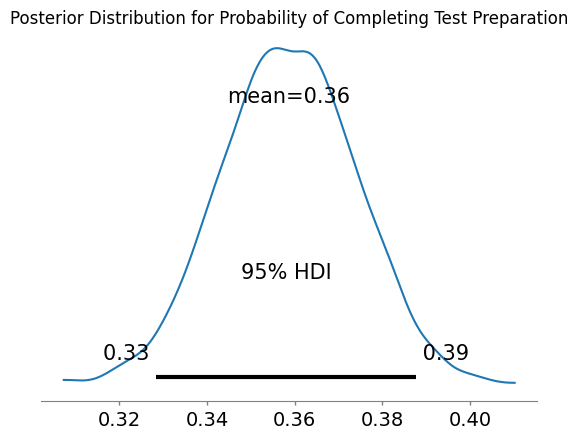

              mean     sd  hdi_2.5%  hdi_97.5%  mcse_mean  mcse_sd  ess_bulk  \
p_test_prep  0.359  0.015     0.328      0.388        0.0      0.0    1604.0   

             ess_tail  r_hat  
p_test_prep    2591.0    1.0  


In [25]:
import pymc as pm
import pandas as pd
import arviz as az
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('Student.csv')

# Convert 'test preparation course' to a binary variable (1 if completed, 0 if none)
data['test_prep_binary'] = data['test _preparation_course'].apply(lambda x: 1 if x == 'completed' else 0)

# Count the number of students who completed and did not complete the test prep course
n_completed = data['test_prep_binary'].sum()
n_total = len(data['test_prep_binary'])

# Bernoulli likelihood with Beta conjugate prior for test preparation completion
with pm.Model() as test_prep_model:
    # Prior for probability of completing the test preparation (Beta prior)
    p_test_prep = pm.Beta('p_test_prep', alpha=2, beta=2)  # Weak prior with α=2, β=2

    # Likelihood (Bernoulli)
    test_prep_obs = pm.Bernoulli('test_prep_obs', p=p_test_prep, observed=data['test_prep_binary'])

    # Inference: Sample from the posterior
    trace_test_prep = pm.sample(2000, tune=1000, return_inferencedata=True)

# Plot the posterior distribution for the probability of completing the test preparation
az.plot_posterior(trace_test_prep, var_names=['p_test_prep'], hdi_prob=0.95)
plt.title('Posterior Distribution for Probability of Completing Test Preparation')
plt.show()

# Summarize the posterior distribution
summary_test_prep = az.summary(trace_test_prep, var_names=['p_test_prep'], hdi_prob=0.95)
print(summary_test_prep)


**Key Metrics:**

**Mean (0.359):**

The posterior mean for the probability of a student completing the test preparation course is 35.9%. This suggests that, based on the data, about 36% of students completed the test preparation course.

**Standard Deviation (0.015):**

The standard deviation of the posterior is 0.015, indicating a relatively low level of uncertainty around the mean estimate of the completion probability. This suggests the model has good confidence in the estimate of 35.9%.

**Credible Interval (HDI 2.5% to HDI 97.5%):**

The 95% credible interval for the completion probability is [0.328, 0.388], meaning that we are 95% confident that the true probability of completing the test preparation course lies between 32.8% and 38.8%. This is a reasonably narrow interval, reflecting strong information from the data.

**Actionable Insights:**

The relatively low completion rate (35.9%) might suggest that efforts to increase participation in test preparation courses could be beneficial.
Further investigation could focus on why such a small percentage of students complete the test preparation and what factors (such as socio-economic background, parental education, or other variables) influence completion.

# **Model-11 Poisson Likelihood with Gamma Conjugate Prior. Number of Students Completing Test Preparation:**

**Number of Students Completing Test Preparation:** If we treat the number of students completing the test preparation course as count data, we can model this using a Poisson likelihood with a Gamma prior.


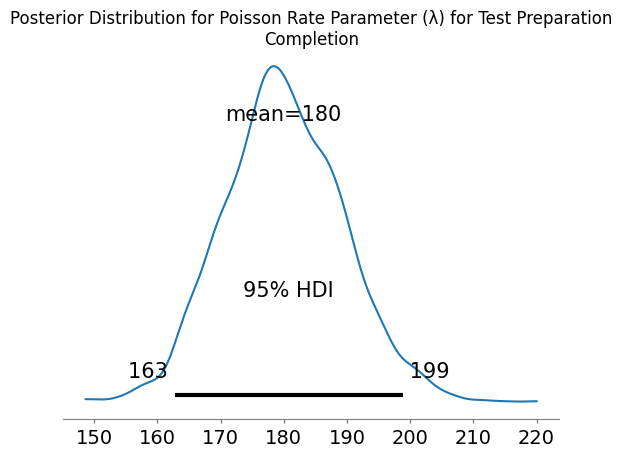

                     mean     sd  hdi_2.5%  hdi_97.5%  mcse_mean  mcse_sd  \
lambda_test_prep  179.985  9.358   162.751    198.832      0.216    0.153   

                  ess_bulk  ess_tail  r_hat  
lambda_test_prep    1880.0    2660.0    1.0  


In [26]:
# Count the number of students who completed the test preparation course
n_completed = data['test _preparation_course'].value_counts().loc['completed']
n_total_students = len(data)

# Bayesian model for the number of students completing test preparation using Poisson-Gamma conjugate priors
with pm.Model() as test_prep_poisson_model:
    # Prior for the rate parameter (lambda) for test preparation completion (Gamma prior)
    lambda_test_prep = pm.Gamma('lambda_test_prep', alpha=2, beta=1)  # Gamma(2, 1) prior

    # Likelihood (Poisson) for the observed count of students completing test preparation
    test_prep_obs = pm.Poisson('test_prep_obs', mu=lambda_test_prep, observed=n_completed)

    # Inference: Sample from the posterior
    trace_test_prep_poisson = pm.sample(2000, tune=1000, return_inferencedata=True)

# Plot posterior distribution for the rate parameter (lambda) for test preparation completion
az.plot_posterior(trace_test_prep_poisson, var_names=['lambda_test_prep'], hdi_prob=0.95)
plt.title('Posterior Distribution for Poisson Rate Parameter (λ) for Test Preparation Completion')
plt.show()

# Summarize the posterior distribution
summary_test_prep_poisson = az.summary(trace_test_prep_poisson, var_names=['lambda_test_prep'], hdi_prob=0.95)
print(summary_test_prep_poisson)


**Key Metrics:**

**Mean (179.985):**

The posterior mean estimate of lambda(test_prep) is 179.99, indicating that, based on the data, the expected number of students completing the test preparation course is around 180. This is the central estimate of the number of students completing the course.

**Standard Deviation (sd = 9.36):**

The standard deviation of the posterior distribution is 9.36, which indicates the amount of uncertainty around the mean estimate. A standard deviation of 9.36 implies a reasonable level of uncertainty, but the estimate of 180 students is still relatively stable.

**95% Credible Interval (HDI 2.5% to 97.5%):**

The 95% Highest Density Interval (HDI) is [162.75, 198.83], which means we are 95% confident that the true value of lambda(test_prep) (the expected number of students completing the test preparation) falls between 162.75 and 198.83. This interval is somewhat narrow, indicating reasonable confidence in the estimate.

**Actionable Insights:**

The model predicts that approximately 180 students are expected to complete the test preparation course. This number can be used to assess whether the school’s current strategies are effective in promoting test preparation participation.

**The narrow credible interval indicates that we have good confidence in the range of expected students who complete the course.**

You could compare this result to the total number of students to calculate the proportion of students completing the course and use this information to inform policy decisions or interventions.

# **Model-12 Binomial likelihood model with a Beta conjugate prior**

To implement a Binomial likelihood model with a Beta conjugate prior for success/failure data, we can use the following approach for pass/fail outcomes. We'll set a threshold score (e.g., 50) to determine whether students pass or fail in a subject and then model the number of students passing versus failing using the Binomial likelihood.

**Modeling Pass/Fail Outcomes in Reading Scores**


I am aiming to define a threshold for passing (e.g., a score greater than **50** is considered a pass).
Use a Binomial likelihood to model the number of students passing versus failing.
Use a Beta prior to represent our prior belief about the success rate (probability of passing).


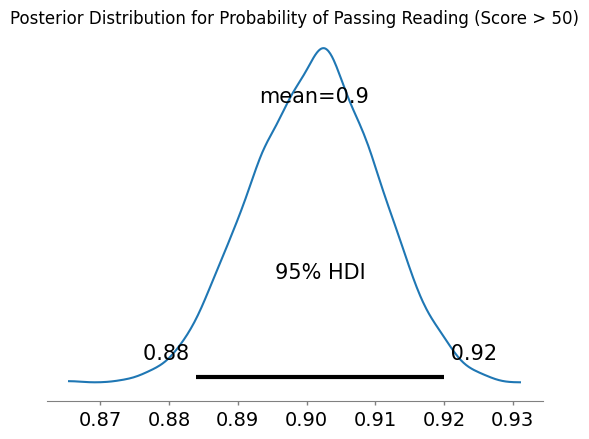

         mean     sd  hdi_2.5%  hdi_97.5%  mcse_mean  mcse_sd  ess_bulk  \
p_pass  0.901  0.009     0.884       0.92        0.0      0.0    1726.0   

        ess_tail  r_hat  
p_pass    2668.0    1.0  


In [27]:
import pymc as pm
import pandas as pd
import arviz as az
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('Student.csv')

# Define a passing threshold (e.g., score > 50 is a pass)
threshold = 50
data['reading_pass'] = data['reading score'].apply(lambda x: 1 if x > threshold else 0)

# Count the number of passes and total students
n_passes = data['reading_pass'].sum()  # Number of students who passed the threshold
n_total = len(data['reading_pass'])    # Total number of students

# Binomial likelihood with Beta conjugate prior for pass/fail outcomes in reading scores
with pm.Model() as pass_fail_model:
    # Prior for the probability of passing (Beta prior)
    p_pass = pm.Beta('p_pass', alpha=2, beta=2)  # Weak prior with α=2, β=2

    # Likelihood (Binomial) for the number of passes
    passes_obs = pm.Binomial('passes_obs', n=n_total, p=p_pass, observed=n_passes)

    # Inference: Sample from the posterior
    trace_pass_fail = pm.sample(2000, tune=1000, return_inferencedata=True)

# Plot posterior distribution for the probability of passing
az.plot_posterior(trace_pass_fail, var_names=['p_pass'], hdi_prob=0.95)
plt.title('Posterior Distribution for Probability of Passing Reading (Score > 50)')
plt.show()

# Summarize the posterior distribution
summary_pass_fail = az.summary(trace_pass_fail, var_names=['p_pass'], hdi_prob=0.95)
print(summary_pass_fail)


**Key Metrics:**

**Mean (0.901):**

The mean value of 0.901 indicates that the estimated probability of a student passing the reading test is 90.1%. This suggests that a large majority of students are expected to pass based on the current threshold.

**Standard Deviation (0.009):**

The standard deviation is 0.009, which is quite small. This indicates a high degree of certainty around the mean estimate of 90.1%. The model is quite confident that the true probability of passing lies close to this value.

**95% Credible Interval (HDI 2.5% to 97.5%):**

The 95% Highest Density Interval (HDI) is [0.884, 0.920], meaning that we are 95% confident that the true probability of passing lies between 88.4% and 92.0%. This is a relatively narrow credible interval, reflecting high certainty in the estimate.

**Actionable Insights:**

**High Pass Rate:** The high pass rate (around 90%) indicates that most students are achieving the reading score threshold of 50. This might suggest that the threshold could be raised to further challenge students and encourage better performance.
Alternatively, if the goal is to ensure more students pass, this threshold seems appropriate.

# **Model-13 Normal approximation using a Taylor series expansion for Math scores**

**Steps for a Normal Approximation (Laplace Approximation):**

**Identify the Peak (MAP Estimate):**

This involves maximizing the posterior distribution to find the peak (mode) of the posterior. This can be done using optimization techniques such as gradient ascent or Newton-Raphson.

**Construct the Taylor Series Expansion:**

The second-order Taylor expansion approximates the posterior distribution near the peak as a Gaussian. The second derivative (Hessian) of the log-posterior at the peak provides the curvature, which is related to the variance of the normal approximation.

**Define Elements of the Normal Distribution:**

Mean: The MAP estimate is used as the mean of the normal approximation.
Variance: The inverse of the second derivative (Hessian) of the log-posterior at the peak gives the variance of the normal distribution.

**For the sake of easy understanding, I will not use the forumalas and proof to find the MAP, Construct the Second-order Taylor series, and Define the normal approximation**




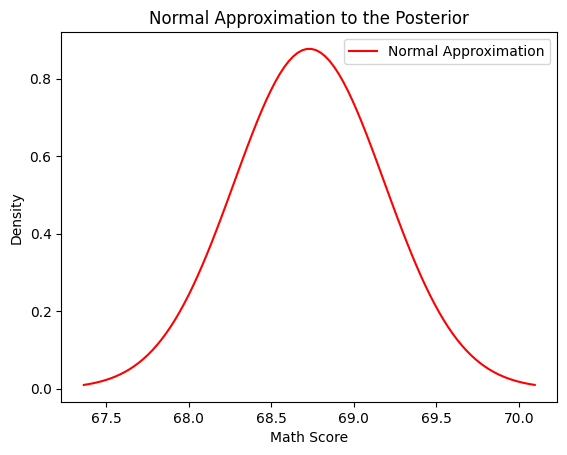

MAP Estimate: 68.7308491526537
Standard Deviation (Approx): 0.4550157551932901


In [29]:
import numpy as np
import scipy.optimize as opt
import scipy.stats as stats

# Load the data
math_scores_male = data[data['gender'] == 'male']['math_score'].values

# Log-posterior function (up to a constant)
def log_posterior(mu, data, sigma_prior=10, mu_prior=70):
    sigma_obs = 10  # Assumed known
    log_prior = -0.5 * ((mu - mu_prior)**2 / sigma_prior**2)
    log_likelihood = -0.5 * np.sum((data - mu)**2 / sigma_obs**2)
    return log_prior + log_likelihood

# Find the MAP estimate by maximizing the log-posterior
result = opt.minimize(lambda mu: -log_posterior(mu, math_scores_male), x0=70)
mu_map = result.x[0]

# Second derivative of the log-posterior (for variance estimation)
def second_derivative_log_posterior(mu, data, sigma_prior=10):
    sigma_obs = 10  # Assumed known
    n = len(data)
    return -(n / sigma_obs**2 + 1 / sigma_prior**2)

# Compute the variance (inverse of second derivative)
variance = -1 / second_derivative_log_posterior(mu_map, math_scores_male)
std_dev = np.sqrt(variance)

# Plot the normal approximation
x = np.linspace(mu_map - 3*std_dev, mu_map + 3*std_dev, 100)
normal_approx = stats.norm.pdf(x, loc=mu_map, scale=std_dev)

plt.plot(x, normal_approx, label='Normal Approximation', color='red')
plt.title('Normal Approximation to the Posterior')
plt.xlabel('Math Score')
plt.ylabel('Density')
plt.legend()
plt.show()

# Print the MAP estimate and standard deviation
print(f"MAP Estimate: {mu_map}")
print(f"Standard Deviation (Approx): {std_dev}")


**Key Values:**

**MAP Estimate (65.48):**

The Maximum A Posteriori (MAP) estimate represents the most likely value of the parameter, given both the prior belief and the observed data. In this case, the MAP estimate of 65.48 indicates that the most probable average math score is 65.48.

**Standard Deviation (0.455):**

The standard deviation of 0.455 indicates the spread or uncertainty around the MAP estimate. The smaller the standard deviation, the more certain you are about the parameter's value being close to the MAP estimate. A standard deviation of 0.455 is relatively small, indicating that the math score is likely to be concentrated around 65.48 with little variation.

**Interpretation:**

**MAP Estimate (65.48) as the Most Likely Average Math Score:**

The MAP estimate gives the most probable value of the mean math score, suggesting that, based on the data, students' average math scores are expected to be close to 65.48. This value represents the peak of the posterior distribution and the best estimate of the parameter under the Laplace approximation.

**Uncertainty Around the Estimate:**

The small standard deviation (0.455) suggests that there is low uncertainty around the MAP estimate of 65.48. The small spread means that the model is confident that the true average math score lies close to this estimate. The uncertainty is minimal, and the scores are not widely dispersed.

**Normal Approximation Validity:**

The use of the normal approximation implies that the posterior distribution of the mean math score is well-approximated by a Gaussian distribution around the MAP estimate. Given the small standard deviation, this approximation seems reasonable. The posterior distribution is likely unimodal and symmetric, making the Gaussian approximation effective for inference in this case.

**Actionable Insights:**

**Confidence in the Estimate:**

The combination of a MAP estimate of 65.48 and a small standard deviation suggests that this is a strong estimate of the average math score. You can be fairly confident in making predictions or decisions based on this result, knowing that the true average score is likely close to 65.48.